In [1]:
import pandas as pd
import numpy as np

In [819]:
url = 'http://sia:3000/backend/busca_generica/buscaGenerica?view=MGCLI.DXDW_HISTORICO_CALIBRES'
dataframe = pd.read_json(url)
dataframe = dataframe.dropna()
dataframe

,SAFRA_ST_CODIGO,TALH_ST_DESCRICAO,CPROC_IN_CODIGO,DATA_EMBALAGEM,ORDEM,VALOR_CALIBRE,CALIBRE
0,M22,AB-005,317,2022-05-03,1,CALIBRE_4,0.000
1,M22,AB-005,317,2022-05-03,1,CALIBRE_5,0.010
2,M22,AB-005,317,2022-05-03,1,CALIBRE_6,0.135
3,M22,AB-005,317,2022-05-03,1,CALIBRE_7,0.243
4,M22,AB-005,317,2022-05-03,1,CALIBRE_8,0.317
...,...,...,...,...,...,...,...
10005,M22,VAL 04,899,2022-09-08,4,CALIBRE_10,0.099
10006,M22,VAL 04,899,2022-09-08,4,CALIBRE_11,0.000
10007,M22,VAL 04,899,2022-09-08,4,CALIBRE_12,0.016
10008,M22,VAL 04,899,2022-09-08,4,CALIBRE_13,0.000


In [820]:
dataframe.to_excel('dados_sem_na33_new.xlsx')

In [29]:
### repetindo valores dos percentuais dos controles
### tem a ordem mas n tem o intervalo de dias entre um controle e outro
### tenho que relacionar isso com os dados de canguras, um procv de controle 
### para tentar entender: COM ESSES DADOS DE ENTRADA DE CANGURAS TEM ALGUMA FORMA DE PREVER O COMPORTAMENTO ??
### BOM TRAZER VARIEDADE TBM

### E ESSA PLANILHA TBM VAI SERVIR PARA TRAZER UM HISTORIUCO MAIS DETALHADO DO TALHAO PARA JULIA
### EX: ESCOLHA UM TALHAO E ESSE É TEU HISTORICO DE CONTROLES MAIS RECENTES




#### VARIAVEIS BOAS
#### MEDIA DE LARGURA GERAL DA AMOSTRAGEM

In [823]:
url_amostragem = 'http://sia:3000/backend/busca_generica/buscaGenerica?view=MGAGR.AGR_VW_DX_CALIBRES_CAMPO%20WHERE%201=1%20AND%20SYSDATE%20-%20to_date(DATA,%27yyyy-mm-dd%27)%20%3C=%2060%20AND%20DATA%20IS%20NOT%20NULL'
df_amostragem_1 = pd.read_json(url_amostragem)

In [824]:
df_amostragem_1

,FAZENDA_TALHAO,TALHAO,FRUTO,D1_LARGURA,D2_COMPRIMENTO,D3_ALTURA,USUARIO,MOMENTO,DATA,GPS,PESO,CALIBRE
0,BOM JESUS - AGD BAHIA-080 - KEITT,AGD BAHIA-080,27,74.49,99.05,147.44,Vandson Felipe,2022-07-21 09:13:04,2022-07-21,0,598.316,7
1,BOM JESUS - AGD BAHIA-078 - KEITT,AGD BAHIA-078,77,78.98,100.25,133.45,Vandson Felipe,2022-07-21 14:15:53,2022-07-21,0,581.143,7
2,FRUTOS DA ILHA 2 - DL-005 - KEITT,DL-005,73,95.00,121.00,77.00,Juvenilson Oliveira Xavier,2022-07-27 14:13:53,2022-07-27,0,486.813,8
3,CACHOEIRA - CACH M09.4 - KEITT,CACH M09.4,47,105.00,131.00,83.00,Natalia Moises,2022-08-05 09:30:49,2022-08-03,0,627.916,6
4,ILHA DA VARZEA - AGD-036 - KEITT,AGD-036,62,85.00,109.00,68.00,Sara Dantas,2022-08-09 08:52:27,2022-08-08,0,346.511,12
...,...,...,...,...,...,...,...,...,...,...,...,...
7860,BOM JESUS - AGD BAHIA-010 - TOMMY,AGD BAHIA-010,24,84.00,90.00,129.00,Vandson Felipe,2022-08-26 07:40:07,2022-08-26,0,536.382,8
7861,ILHA DA VARZEA - AGD-036 - KEITT,AGD-036,93,101.00,121.00,75.00,Juvenilson Oliveira Xavier,2022-09-01 15:25:39,2022-09-01,0,504.116,8
7862,BOM JESUS - AGD BAHIA-038 - TOMMY,AGD BAHIA-038,89,81.00,88.00,114.00,Vandson Felipe,2022-09-09 09:51:45,2022-09-09,0,446.926,9
7863,ILHA DA VARZEA - AGD-036 - KEITT,AGD-036,16,98.00,134.00,77.00,Sara Dantas,2022-09-12 13:26:10,2022-09-08,0,556.140,7


In [825]:
dados = df_amostragem_1.groupby(['TALHAO','CALIBRE'])['DATA'].max()
dados2 = pd.DataFrame(dados)
dados2 = dados2.reset_index()

In [846]:
dados2

,TALHAO,CALIBRE,DATA,coluna_merg
0,AGD BAHIA-009,10,2022-09-08,AGD BAHIA-009102022-09-08
1,AGD BAHIA-009,12,2022-09-08,AGD BAHIA-009122022-09-08
2,AGD BAHIA-009,14,2022-09-08,AGD BAHIA-009142022-09-08
3,AGD BAHIA-009,7,2022-09-08,AGD BAHIA-00972022-09-08
4,AGD BAHIA-009,8,2022-09-08,AGD BAHIA-00982022-09-08
...,...,...,...,...
250,FI-009,6,2022-09-07,FI-00962022-09-07
251,FI-009,7,2022-09-07,FI-00972022-09-07
252,FI-009,8,2022-09-07,FI-00982022-09-07
253,FI-009,9,2022-09-07,FI-00992022-09-07


In [829]:
dados2['coluna_merg'] = dados2['TALHAO'] + dados2['CALIBRE'] + dados2['DATA']
df_amostragem_1['coluna_merge'] = df_amostragem_1['TALHAO']+ df_amostragem_1['CALIBRE']+df_amostragem_1['DATA']
dataset_merge = df_amostragem_1.merge(dados2, left_on = 'coluna_merge', right_on = 'coluna_merg')

In [832]:
dataset_merge

,FAZENDA_TALHAO,TALHAO_x,FRUTO,D1_LARGURA,D2_COMPRIMENTO,D3_ALTURA,USUARIO,MOMENTO,DATA_x,GPS,PESO,CALIBRE_x,coluna_merge,TALHAO_y,CALIBRE_y,DATA_y,coluna_merg
0,FRUTOS DA ILHA 2 - DL-003 - TOMMY,DL-003,38,86.0,105.0,84.0,Marcelo Augusto dos Santos,2022-08-24 08:41:54,2022-08-23,0,417.186,10,DL-003102022-08-23,DL-003,10,2022-08-23,DL-003102022-08-23
1,FRUTOS DA ILHA 2 - DL-003 - TOMMY,DL-003,11,93.0,105.0,82.0,Marcelo Augusto dos Santos,2022-08-24 08:36:36,2022-08-23,0,440.402,10,DL-003102022-08-23,DL-003,10,2022-08-23,DL-003102022-08-23
2,FRUTOS DA ILHA 2 - DL-003 - TOMMY,DL-003,69,86.0,101.0,82.0,Marcelo Augusto dos Santos,2022-08-24 08:50:24,2022-08-23,0,391.739,10,DL-003102022-08-23,DL-003,10,2022-08-23,DL-003102022-08-23
3,FRUTOS DA ILHA 2 - DL-003 - TOMMY,DL-003,84,88.0,109.0,80.0,Marcelo Augusto dos Santos,2022-08-24 08:54:05,2022-08-23,0,422.048,10,DL-003102022-08-23,DL-003,10,2022-08-23,DL-003102022-08-23
4,FRUTOS DA ILHA 2 - DL-003 - TOMMY,DL-003,42,91.0,107.0,80.0,Marcelo Augusto dos Santos,2022-08-24 08:44:53,2022-08-23,0,428.428,10,DL-003102022-08-23,DL-003,10,2022-08-23,DL-003102022-08-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3504,FRUTOS DA ILHA 2 - DL-005 - KEITT,DL-005,40,104.0,45.0,80.0,Juvenilson Oliveira Xavier,2022-07-27 14:02:49,2022-07-27,0,205.920,Pequeno,DL-005Pequeno2022-07-27,DL-005,Pequeno,2022-07-27,DL-005Pequeno2022-07-27
3505,ILHA DA VARZEA - AGD-036 - KEITT,AGD-036,86,95.0,123.0,72.0,Sara Dantas,2022-09-12 13:43:56,2022-09-08,0,462.726,9,AGD-03692022-09-08,AGD-036,9,2022-09-08,AGD-03692022-09-08
3506,ILHA DA VARZEA - AGD-036 - KEITT,AGD-036,77,93.0,123.0,75.0,Sara Dantas,2022-09-12 13:41:22,2022-09-08,0,471.859,9,AGD-03692022-09-08,AGD-036,9,2022-09-08,AGD-03692022-09-08
3507,FRUTOS DA ILHA 2 - DL-003 - TOMMY,DL-003,71,15.0,119.0,101.0,Marcelo Augusto dos Santos,2022-08-24 08:50:47,2022-08-23,0,99.157,Pequeno,DL-003Pequeno2022-08-23,DL-003,Pequeno,2022-08-23,DL-003Pequeno2022-08-23


In [833]:
# filtro_talhao = df_amostragem_1['TALHAO'] == 'AGD-034'
# dataset_talhao_controle = df_amostragem_1[filtro_talhao]
# dataset_talhao_controle

In [834]:
### PREVER O PESO OU CALIBRE - PESO DE CALIBRE N DA PRA RELACIONAR DIRETAMENTE COM OS ONCTROLES
### APENAS OS PERCENTUAIS


## E SO DA PRA RELACIONAR NIVEL TALHAO NAO NIVEL CONTROLE

In [835]:

df_amostragem_2 = dataset_merge[['TALHAO_x','FRUTO','PESO','CALIBRE_x']]

df_amostragem_1_piv = pd.pivot_table(dataset_merge, values = ['FRUTO','PESO'], index=['CALIBRE_x','TALHAO_x'],
                aggfunc={'FRUTO': np.sum,
                            'PESO': np.mean})
df_amostragem_1_piv = df_amostragem_1_piv.reset_index()

In [843]:
df_amostragem_1_piv

,CALIBRE_x,TALHAO_x,FRUTO,PESO
0,10,AGD BAHIA-009,2912,406.105070
1,10,AGD BAHIA-010,2953,405.305105
2,10,AGD BAHIA-026,2182,410.017762
3,10,AGD BAHIA-034,364,411.568667
4,10,AGD BAHIA-038,2218,412.514452
...,...,...,...,...
250,Pequeno,CACH M11.2,12,273.735000
251,Pequeno,CACH M12.2,77,212.342500
252,Pequeno,DL-003,71,99.157000
253,Pequeno,DL-005,40,205.920000


In [837]:
# tenho que fazer um groupby para fazer o percent de frutos

df_amostragem_1_piv.groupby(['TALHAO_x','CALIBRE_x'])['FRUTO'].sum()

TALHAO_x       CALIBRE_x
AGD BAHIA-009  10           2912
               12           1194
               14             11
               7               9
               8             286
                            ... 
FI-009         6             511
               7            1148
               8            1773
               9             568
               Pequeno      1006
Name: FRUTO, Length: 255, dtype: int64

In [838]:
df_amostragem_1_piv.groupby(['TALHAO_x'])['FRUTO'].sum()

TALHAO_x
AGD BAHIA-009     5113
AGD BAHIA-010     4950
AGD BAHIA-026     5049
AGD BAHIA-034     4950
AGD BAHIA-038     4940
AGD BAHIA-040     4950
AGD BAHIA-047     4984
AGD BAHIA-048     4950
AGD BAHIA-049     4969
AGD BAHIA-050     4950
AGD BAHIA-072     4950
AGD BAHIA-075     4950
AGD BAHIA-077     4950
AGD BAHIA-078     5045
AGD BAHIA-079     5146
AGD BAHIA-080     5081
AGD-006           4967
AGD-009 V1        4919
AGD-013V2         5172
AGD-036           5017
AGD-042          12458
AGD-046           5023
AGD-052           5014
AGD-081           5020
AGD-096           4992
AGD-108           4028
CACH M05          5408
CACH M09.4        5181
CACH M11.1        5050
CACH M11.2        5103
CACH M12.2        5050
CACH-018          5117
DL-003            4775
DL-005            5099
FI-009            5903
Name: FRUTO, dtype: int64

In [839]:
amostragem_percents = df_amostragem_1_piv.groupby(['TALHAO_x','CALIBRE_x'])['FRUTO'].sum() / df_amostragem_1_piv.groupby(['TALHAO_x'])['FRUTO'].sum() 

In [840]:
amostragem_percents = pd.DataFrame(amostragem_percents)
amostragem_percents = amostragem_percents.reset_index()
amostragem_percents

,TALHAO_x,CALIBRE_x,FRUTO
0,AGD BAHIA-009,10,0.569529
1,AGD BAHIA-009,12,0.233522
2,AGD BAHIA-009,14,0.002151
3,AGD BAHIA-009,7,0.001760
4,AGD BAHIA-009,8,0.055936
...,...,...,...
250,FI-009,6,0.086566
251,FI-009,7,0.194477
252,FI-009,8,0.300356
253,FI-009,9,0.096222


In [841]:
#amostragem_percents.to_excel('percentuais_talhoes_amostragens33.xlsx')


In [842]:
######## PARTINDO PARA ANALISE DOS DADOS PRONTOS

In [2]:
dataframe = pd.read_excel('dados_sem_na22_new.xlsx', sheet_name = 'Sheet1')

In [3]:
dataframe = dataframe.fillna(value=0)

In [4]:
dataframe.isnull().sum()

SAFRA_ST_CODIGO                  0
TALH_ST_DESCRICAO                0
variedade                        0
CPROC_IN_CODIGO                  0
DATA_EMBALAGEM                   0
ORDEM                            0
VALOR_CALIBRE                    0
CALIBRE                          0
PERCENT_AMOSTRAGEM_recent        0
DATA_AMOSTRAGEM                  0
DIAS_ATE_EMBALA                  0
avg_larg_calibre_amost           0
avg_com_calibre_amost            0
avg_altura_calibre_amost         0
AVG_PESO_calibre_amostragem      0
AVG_frutos_calibre_amostragem    0
avg_larg_amostra                 0
avg_comp_amostra                 0
avg_altura_amostra               0
MEDIA_PESO                       0
frutos_amostrados                0
dtype: int64

In [5]:
dataframe.corr()

,CPROC_IN_CODIGO,ORDEM,CALIBRE,PERCENT_AMOSTRAGEM_recent,DIAS_ATE_EMBALA,avg_larg_calibre_amost,avg_com_calibre_amost,avg_altura_calibre_amost,AVG_PESO_calibre_amostragem,AVG_frutos_calibre_amostragem,avg_larg_amostra,avg_comp_amostra,avg_altura_amostra,MEDIA_PESO,frutos_amostrados
CPROC_IN_CODIGO,1.000000,0.415041,-0.003781,-0.000777,0.465549,0.045313,-0.105969,0.068210,0.007165,0.114671,0.268169,-0.387752,0.177087,-0.062497,0.188971
ORDEM,0.415041,1.000000,-0.000638,0.000967,0.695134,0.049777,0.062221,-0.147267,-0.028395,0.019272,0.292405,0.230662,-0.388013,-0.055928,-0.066081
CALIBRE,-0.003781,-0.000638,1.000000,0.498494,-0.004968,0.407867,0.395963,0.359055,0.474729,0.231298,0.001171,0.001464,0.001003,0.003509,-0.001209
PERCENT_AMOSTRAGEM_recent,-0.000777,0.000967,0.498494,1.000000,0.008373,0.302532,0.290473,0.272638,0.324394,0.222142,0.006280,-0.002954,-0.006495,-0.009368,-0.006418
DIAS_ATE_EMBALA,0.465549,0.695134,-0.004968,0.008373,1.000000,0.004076,0.011559,-0.047795,-0.018258,-0.007459,0.012033,0.044884,-0.141675,-0.135708,-0.037648
avg_larg_calibre_amost,0.045313,0.049777,0.407867,0.302532,0.004076,1.000000,0.952658,0.859402,0.914892,0.764142,-0.004117,0.010726,0.060470,0.097376,0.187488
avg_com_calibre_amost,-0.105969,0.062221,0.395963,0.290473,0.011559,0.952658,1.000000,0.815053,0.921236,0.709090,-0.105248,0.240066,0.019352,0.260405,0.190173
avg_altura_calibre_amost,0.068210,-0.147267,0.359055,0.272638,-0.047795,0.859402,0.815053,1.000000,0.888719,0.731565,-0.389207,-0.236114,0.516241,0.170644,0.280050
AVG_PESO_calibre_amostragem,0.007165,-0.028395,0.474729,0.324394,-0.018258,0.914892,0.921236,0.888719,1.000000,0.677557,-0.172034,0.047675,0.211062,0.239120,0.222837
AVG_frutos_calibre_amostragem,0.114671,0.019272,0.231298,0.222142,-0.007459,0.764142,0.709090,0.731565,0.677557,1.000000,-0.125464,-0.091064,0.205982,0.111728,0.463907


In [6]:
### ANALISAR PRIMEIRO SE ACERTA MAIS CONFORME OS DIAS AUMENTAM OU DIMINUI

In [7]:
dataframe.head(5)

,SAFRA_ST_CODIGO,TALH_ST_DESCRICAO,variedade,CPROC_IN_CODIGO,DATA_EMBALAGEM,ORDEM,VALOR_CALIBRE,CALIBRE,PERCENT_AMOSTRAGEM_recent,DATA_AMOSTRAGEM,...,avg_larg_calibre_amost,avg_com_calibre_amost,avg_altura_calibre_amost,AVG_PESO_calibre_amostragem,AVG_frutos_calibre_amostragem,avg_larg_amostra,avg_comp_amostra,avg_altura_amostra,MEDIA_PESO,frutos_amostrados
0,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_5,0.224,0.018586,2022-07-28,...,87.333333,107.666667,153.000000,791.211333,30.666667,81.14,98.02,133.98,591.39293,4950
1,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_6,0.380,0.374747,2022-07-28,...,84.195122,102.365854,141.487805,670.825561,45.243902,81.14,98.02,133.98,591.39293,4950
2,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_7,0.261,0.254545,2022-07-28,...,81.739130,98.695652,134.347826,595.789435,54.782609,81.14,98.02,133.98,591.39293,4950
3,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_8,0.074,0.188283,2022-07-28,...,77.952381,93.428571,129.904762,520.191571,44.380952,81.14,98.02,133.98,591.39293,4950
4,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_9,0.025,0.050707,2022-07-28,...,74.666667,88.000000,125.000000,451.245667,83.666667,81.14,98.02,133.98,591.39293,4950


In [8]:
dataframe['Diferenca_predict'] = abs(dataframe['CALIBRE'] - dataframe['PERCENT_AMOSTRAGEM_recent'])

In [9]:
dataframe

,SAFRA_ST_CODIGO,TALH_ST_DESCRICAO,variedade,CPROC_IN_CODIGO,DATA_EMBALAGEM,ORDEM,VALOR_CALIBRE,CALIBRE,PERCENT_AMOSTRAGEM_recent,DATA_AMOSTRAGEM,...,avg_com_calibre_amost,avg_altura_calibre_amost,AVG_PESO_calibre_amostragem,AVG_frutos_calibre_amostragem,avg_larg_amostra,avg_comp_amostra,avg_altura_amostra,MEDIA_PESO,frutos_amostrados,Diferenca_predict
0,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_5,0.224,0.018586,2022-07-28,...,107.666667,153.000000,791.211333,30.666667,81.140000,98.020000,133.980000,591.392930,4950,0.205414
1,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_6,0.380,0.374747,2022-07-28,...,102.365854,141.487805,670.825561,45.243902,81.140000,98.020000,133.980000,591.392930,4950,0.005253
2,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_7,0.261,0.254545,2022-07-28,...,98.695652,134.347826,595.789435,54.782609,81.140000,98.020000,133.980000,591.392930,4950,0.006455
3,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_8,0.074,0.188283,2022-07-28,...,93.428571,129.904762,520.191571,44.380952,81.140000,98.020000,133.980000,591.392930,4950,0.114283
4,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_9,0.025,0.050707,2022-07-28,...,88.000000,125.000000,451.245667,83.666667,81.140000,98.020000,133.980000,591.392930,4950,0.025707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,M22,DL-005,KEITT,841,2022-08-24,4,CALIBRE_7,0.261,0.271972,2022-08-09,...,134.037037,80.481481,576.438074,52.148148,100.777778,137.060606,83.151515,634.595081,5045,0.010972
654,M22,DL-005,KEITT,841,2022-08-24,4,CALIBRE_8,0.039,0.152212,2022-08-09,...,126.333333,78.500000,520.888083,65.666667,100.777778,137.060606,83.151515,634.595081,5045,0.113212
655,M22,DL-005,KEITT,841,2022-08-24,4,CALIBRE_9,0.001,0.031679,2022-08-09,...,119.500000,75.500000,468.827500,82.000000,100.777778,137.060606,83.151515,634.595081,5045,0.030679
656,M22,DL-005,KEITT,841,2022-08-24,4,CALIBRE_10,0.000,0.001738,2022-08-09,...,0.000000,0.000000,0.000000,0.000000,100.777778,137.060606,83.151515,634.595081,5045,0.001738


In [10]:
def acertos(dataframe):
    if dataframe['Diferenca_predict'] > 0.11:
        return 'ERROU'
    else:
        return 'ACERTOU'

dataframe['Check'] = dataframe.apply(acertos, axis = 1)
    

In [11]:
amostragem_percents = df_amostragem_1_piv.groupby(['TALHAO_x','VALOR_CALIBRE'])['FRUTO'].sum() / df_amostragem_1_piv.groupby(['TALHAO_x'])['FRUTO'].sum() 

NameError: name 'df_amostragem_1_piv' is not defined

In [ ]:
acertos_por_calibre = dataframe.groupby(['VALOR_CALIBRE'])['Check'].value_counts() / dataframe.groupby(['VALOR_CALIBRE'])['Check'].count()
acertos_por_calibre = pd.DataFrame(acertos_por_calibre)
acertos_por_calibre.rename(columns = {'Check':'Percent'}, inplace = 1)
acertos_por_calibre = acertos_por_calibre.reset_index()
acertos_por_calibre

,VALOR_CALIBRE,Check,Percent
0,CALIBRE_10,ACERTOU,0.787234
1,CALIBRE_10,ERROU,0.212766
2,CALIBRE_12,ACERTOU,0.776596
3,CALIBRE_12,ERROU,0.223404
4,CALIBRE_5,ACERTOU,0.734043
5,CALIBRE_5,ERROU,0.265957
6,CALIBRE_6,ACERTOU,0.680851
7,CALIBRE_6,ERROU,0.319149
8,CALIBRE_7,ACERTOU,0.702128
9,CALIBRE_7,ERROU,0.297872


In [12]:
def acerto(dataframe):
    if dataframe['VALOR_CALIBRE'] == 'CALIBRE_10':
        return 0.794643
    if dataframe['VALOR_CALIBRE'] == 'CALIBRE_12':
        return 0.776786
    if dataframe['VALOR_CALIBRE'] == 'CALIBRE_9':
        return 0.776786
    if dataframe['VALOR_CALIBRE'] == 'CALIBRE_8':
        return 0.651786
    if dataframe['VALOR_CALIBRE'] == 'CALIBRE_7':
        return 0.705357
    if dataframe['VALOR_CALIBRE'] == 'CALIBRE_6':
        return 0.616071
    if dataframe['VALOR_CALIBRE'] == 'CALIBRE_5':
        return 0.732143
dataframe['percent_Acerto'] = dataframe.apply(acerto, axis = 1)


In [13]:
dataframe

,SAFRA_ST_CODIGO,TALH_ST_DESCRICAO,variedade,CPROC_IN_CODIGO,DATA_EMBALAGEM,ORDEM,VALOR_CALIBRE,CALIBRE,PERCENT_AMOSTRAGEM_recent,DATA_AMOSTRAGEM,...,AVG_PESO_calibre_amostragem,AVG_frutos_calibre_amostragem,avg_larg_amostra,avg_comp_amostra,avg_altura_amostra,MEDIA_PESO,frutos_amostrados,Diferenca_predict,Check,percent_Acerto
0,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_5,0.224,0.018586,2022-07-28,...,791.211333,30.666667,81.140000,98.020000,133.980000,591.392930,4950,0.205414,ERROU,0.732143
1,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_6,0.380,0.374747,2022-07-28,...,670.825561,45.243902,81.140000,98.020000,133.980000,591.392930,4950,0.005253,ACERTOU,0.616071
2,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_7,0.261,0.254545,2022-07-28,...,595.789435,54.782609,81.140000,98.020000,133.980000,591.392930,4950,0.006455,ACERTOU,0.705357
3,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_8,0.074,0.188283,2022-07-28,...,520.191571,44.380952,81.140000,98.020000,133.980000,591.392930,4950,0.114283,ERROU,0.651786
4,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_9,0.025,0.050707,2022-07-28,...,451.245667,83.666667,81.140000,98.020000,133.980000,591.392930,4950,0.025707,ACERTOU,0.776786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,M22,DL-005,KEITT,841,2022-08-24,4,CALIBRE_7,0.261,0.271972,2022-08-09,...,576.438074,52.148148,100.777778,137.060606,83.151515,634.595081,5045,0.010972,ACERTOU,0.705357
654,M22,DL-005,KEITT,841,2022-08-24,4,CALIBRE_8,0.039,0.152212,2022-08-09,...,520.888083,65.666667,100.777778,137.060606,83.151515,634.595081,5045,0.113212,ERROU,0.651786
655,M22,DL-005,KEITT,841,2022-08-24,4,CALIBRE_9,0.001,0.031679,2022-08-09,...,468.827500,82.000000,100.777778,137.060606,83.151515,634.595081,5045,0.030679,ACERTOU,0.776786
656,M22,DL-005,KEITT,841,2022-08-24,4,CALIBRE_10,0.000,0.001738,2022-08-09,...,0.000000,0.000000,100.777778,137.060606,83.151515,634.595081,5045,0.001738,ACERTOU,0.794643


In [14]:
import plotly.express as px
import plotly.graph_objects as gl

fig = px.histogram(x = dataframe['VALOR_CALIBRE'], histfunc = 'avg' ,y= dataframe['percent_Acerto'],title = 'Amostragem sem regressão - Percentual', category_orders=  {'VALOR_CALIBRE':['CALIBRE_5','CALIBRE_6','CALIBRE_7','CALIBRE_8','CALIBRE_9','CALIBRE_10','CALIBRE_12']})
fig.add_hline(y = 0.80)
fig.update_layout(height = 500, width = 1000)
fig

In [15]:
### PERCEBE_SE QUE A AMOSTRAGEM MELHORA BASTANTE AO PEGARMOS A AMOSTRAGEM MAIS PROXIMA DA EMBALAGEM
dataframe

,SAFRA_ST_CODIGO,TALH_ST_DESCRICAO,variedade,CPROC_IN_CODIGO,DATA_EMBALAGEM,ORDEM,VALOR_CALIBRE,CALIBRE,PERCENT_AMOSTRAGEM_recent,DATA_AMOSTRAGEM,...,AVG_PESO_calibre_amostragem,AVG_frutos_calibre_amostragem,avg_larg_amostra,avg_comp_amostra,avg_altura_amostra,MEDIA_PESO,frutos_amostrados,Diferenca_predict,Check,percent_Acerto
0,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_5,0.224,0.018586,2022-07-28,...,791.211333,30.666667,81.140000,98.020000,133.980000,591.392930,4950,0.205414,ERROU,0.732143
1,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_6,0.380,0.374747,2022-07-28,...,670.825561,45.243902,81.140000,98.020000,133.980000,591.392930,4950,0.005253,ACERTOU,0.616071
2,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_7,0.261,0.254545,2022-07-28,...,595.789435,54.782609,81.140000,98.020000,133.980000,591.392930,4950,0.006455,ACERTOU,0.705357
3,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_8,0.074,0.188283,2022-07-28,...,520.191571,44.380952,81.140000,98.020000,133.980000,591.392930,4950,0.114283,ERROU,0.651786
4,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_9,0.025,0.050707,2022-07-28,...,451.245667,83.666667,81.140000,98.020000,133.980000,591.392930,4950,0.025707,ACERTOU,0.776786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,M22,DL-005,KEITT,841,2022-08-24,4,CALIBRE_7,0.261,0.271972,2022-08-09,...,576.438074,52.148148,100.777778,137.060606,83.151515,634.595081,5045,0.010972,ACERTOU,0.705357
654,M22,DL-005,KEITT,841,2022-08-24,4,CALIBRE_8,0.039,0.152212,2022-08-09,...,520.888083,65.666667,100.777778,137.060606,83.151515,634.595081,5045,0.113212,ERROU,0.651786
655,M22,DL-005,KEITT,841,2022-08-24,4,CALIBRE_9,0.001,0.031679,2022-08-09,...,468.827500,82.000000,100.777778,137.060606,83.151515,634.595081,5045,0.030679,ACERTOU,0.776786
656,M22,DL-005,KEITT,841,2022-08-24,4,CALIBRE_10,0.000,0.001738,2022-08-09,...,0.000000,0.000000,100.777778,137.060606,83.151515,634.595081,5045,0.001738,ACERTOU,0.794643


In [16]:
import plotly.express as px
import plotly.graph_objects as gl

fig = px.bar(dataframe, x = dataframe['VALOR_CALIBRE'], color = dataframe['Check'],facet_col = 'variedade' ,barmode= 'stack', title = 'Amostragem sem regressão - Cada traço = 1 previsão')
fig.update_layout(height = 500, width = 1000)
fig

In [24]:
# fig = px.histogram(dataframe, x = dataframe['DIAS_ATE_EMBALA'], color = dataframe['Check'], barmode= 'group')
# fig

In [17]:
fig = px.histogram(dataframe, x = dataframe['DIAS_ATE_EMBALA'],y =dataframe['Diferenca_predict'] ,facet_col = 'variedade' ,histfunc = 'avg',facet_row = 'VALOR_CALIBRE', barmode = 'group', title = 'Média de erro por calibre ao longo do avanço dos dias até embalagem')
fig.update_layout(height = 1600, width = 1200)

fig.add_vline(x = 30)
fig.add_vline(x = 21)
fig.add_vline(x = 14)
fig.add_vline(x = 7)
fig.add_hline(0.1, line_color = 'red', line_dash="dot",  annotation_text="0.1 de Dif", annotation_font_color="red")

In [18]:
fig = px.histogram(dataframe, x = dataframe['ORDEM'],y =dataframe['Diferenca_predict'] , histfunc = 'avg',facet_col = 'variedade',facet_row = 'VALOR_CALIBRE', barmode = 'group', title = 'Média de erro por calibre ao longo do avanço dos controles')
fig.update_layout(height = 1600, width = 1200)

fig.add_vline(x = 6)
fig.add_vline(x = 12)


fig.add_hline(0.1, line_color = 'red', line_dash="dot",  annotation_text="0.1 de Dif", annotation_font_color="red")

In [1017]:
## OS CALIBRES COM PIORES DESEMPENHOS POSSUEM UMA ALTA DIFERENCA EM ATE UMA SEMANA E MEIA
## OU SEJA, SE FOR EMBALAR UM TALHAO EM ATE UMA SEMANA E MEIA DA AMOSTRAGEM VAI ERRAR MUITO 
## UM POUCO ANTES DA SEGUNDA SEMANA É UMA BOA
##

## DE MANEIRA GERAL, A AMOSTRAGEM NA TERCEIRA SEMANA DA EMBALAGEM SERIA O IDEAL

## COLHER MAIS PERTO DA EMBALAGEM É BOM APENAS PARA O CALIBRE MAIORES
## COLHER COLHER MAIS LONGE DA EMBALAGEM NAO É BOM PARA ESSES CALIBRES

## PARECE SER UMA RELAÇAO INVERSA
## CALIBRE MAIOR É MAIS PRECISO PERTO DA EMBALAGEM
## CALIBRE MENOR MAIS PRECISO MAIS LONGE DA EMBALAGEM

In [1018]:
fig = px.histogram(dataframe, x = dataframe['frutos_amostrados'],y =dataframe['Diferenca_predict'] , histfunc = 'avg',facet_col = 'VALOR_CALIBRE', barmode = 'group',)
fig.update_layout(height = 450, width = 1600)

fig.add_hline(0.1, line_color = 'red', line_dash="dot",  annotation_text="0.1 de Dif", annotation_font_color="red")

In [1019]:
# ENTRE 5000 e 5500 frutos por calibre, todos erram abaixo do treshold

In [19]:
fig = px.histogram(dataframe, x = dataframe['ORDEM'],y =dataframe['CALIBRE'] ,facet_col = 'variedade' ,histfunc = 'avg',facet_row = 'VALOR_CALIBRE', barmode = 'group', title = 'Média do percent do calibre ao longo do avanço dos controles')
fig.update_layout(height = 1600, width = 1200)

fig.add_vline(x = 6,  annotation_text="6º Controle")
fig.add_vline(x = 12,  annotation_text="12º Controle")


fig.add_hline(0.1, line_color = 'red', line_dash="dot",  annotation_text="10%", annotation_font_color="red")
fig.add_hline(0.2, line_color = 'green', line_dash="dot",  annotation_text="20%", annotation_font_color="green")

In [20]:
dataframe.columns

Index(['SAFRA_ST_CODIGO', 'TALH_ST_DESCRICAO', 'variedade', 'CPROC_IN_CODIGO',
       'DATA_EMBALAGEM', 'ORDEM', 'VALOR_CALIBRE', 'CALIBRE',
       'PERCENT_AMOSTRAGEM_recent', 'DATA_AMOSTRAGEM', 'DIAS_ATE_EMBALA',
       'avg_larg_calibre_amost', 'avg_com_calibre_amost',
       'avg_altura_calibre_amost', 'AVG_PESO_calibre_amostragem',
       'AVG_frutos_calibre_amostragem', 'avg_larg_amostra', 'avg_comp_amostra',
       'avg_altura_amostra', 'MEDIA_PESO', 'frutos_amostrados',
       'Diferenca_predict', 'Check', 'percent_Acerto'],
      dtype='object')

In [22]:
fig = px.histogram(dataframe, x = dataframe['DIAS_ATE_EMBALA'],y =dataframe['PERCENT_AMOSTRAGEM_recent'] ,facet_col = 'variedade' ,histfunc = 'avg',facet_row = 'VALOR_CALIBRE', barmode = 'group', title = 'Média do calibre ao longo do avanço dos dias')
fig.update_layout(height = 1600, width = 1200)

fig.add_vline(x = 10,  annotation_text="10 Dias")
fig.add_vline(x = 20,  annotation_text="20 Dias" )


### TEM QUE SER O PERCENT DA AMOSTRA AQUI


fig.add_hline(0.1, line_color = 'red', line_dash="dot",  annotation_text="10%", annotation_font_color="red")
fig.add_hline(0.2, line_color = 'green', line_dash="dot",  annotation_text="20%", annotation_font_color="green")

In [23]:
corr = dataframe.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\BERNAR~1.COL\AppData\Local\Temp/ipykernel_18116/3902572912.py:2: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,CPROC_IN_CODIGO,ORDEM,CALIBRE,PERCENT_AMOSTRAGEM_recent,DIAS_ATE_EMBALA,avg_larg_calibre_amost,avg_com_calibre_amost,avg_altura_calibre_amost,AVG_PESO_calibre_amostragem,AVG_frutos_calibre_amostragem,avg_larg_amostra,avg_comp_amostra,avg_altura_amostra,MEDIA_PESO,frutos_amostrados,Diferenca_predict,percent_Acerto
CPROC_IN_CODIGO,1.00,0.42,-0.00,-0.00,0.47,0.05,-0.11,0.07,0.01,0.11,0.27,-0.39,0.18,-0.06,0.19,0.01,0.00
ORDEM,0.42,1.00,-0.00,0.00,0.70,0.05,0.06,-0.15,-0.03,0.02,0.29,0.23,-0.39,-0.06,-0.07,0.04,-0.00
CALIBRE,-0.00,-0.00,1.00,0.50,-0.00,0.41,0.40,0.36,0.47,0.23,0.00,0.00,0.00,0.00,-0.00,0.34,-0.34
PERCENT_AMOSTRAGEM_recent,-0.00,0.00,0.50,1.00,0.01,0.30,0.29,0.27,0.32,0.22,0.01,-0.00,-0.01,-0.01,-0.01,0.38,-0.47
DIAS_ATE_EMBALA,0.47,0.70,-0.00,0.01,1.00,0.00,0.01,-0.05,-0.02,-0.01,0.01,0.04,-0.14,-0.14,-0.04,0.01,-0.00
avg_larg_calibre_amost,0.05,0.05,0.41,0.30,0.00,1.00,0.95,0.86,0.91,0.76,-0.00,0.01,0.06,0.10,0.19,0.14,-0.13
avg_com_calibre_amost,-0.11,0.06,0.40,0.29,0.01,0.95,1.00,0.82,0.92,0.71,-0.11,0.24,0.02,0.26,0.19,0.14,-0.15
avg_altura_calibre_amost,0.07,-0.15,0.36,0.27,-0.05,0.86,0.82,1.00,0.89,0.73,-0.39,-0.24,0.52,0.17,0.28,0.04,-0.14
AVG_PESO_calibre_amostragem,0.01,-0.03,0.47,0.32,-0.02,0.91,0.92,0.89,1.00,0.68,-0.17,0.05,0.21,0.24,0.22,0.17,-0.32
AVG_frutos_calibre_amostragem,0.11,0.02,0.23,0.22,-0.01,0.76,0.71,0.73,0.68,1.00,-0.13,-0.09,0.21,0.11,0.46,-0.00,-0.01


<AxesSubplot:>

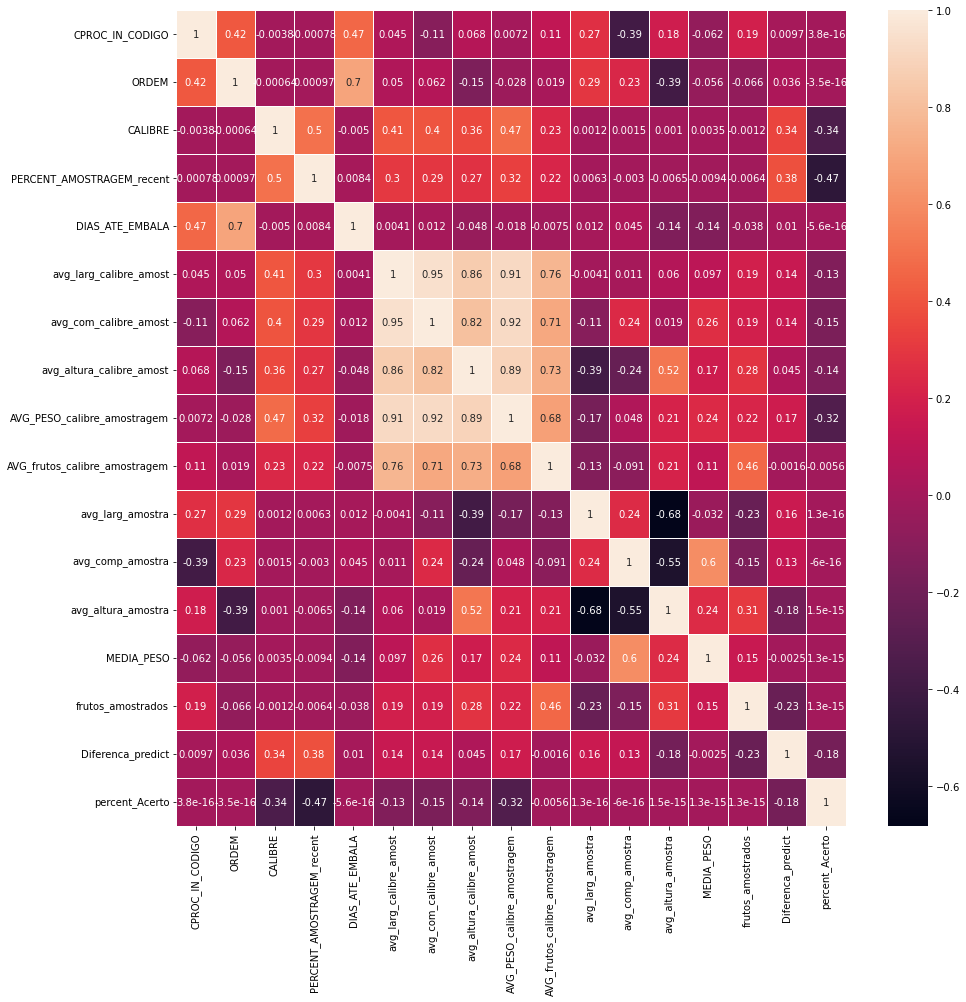

In [27]:
import seaborn as sn
import matplotlib.pyplot as plt
correlation = dataframe.corr()
figura = plt.figure(figsize=(15,15))

plot = sn.heatmap(correlation, annot=True,linewidths=.6)
plot

In [25]:
dataframe

,SAFRA_ST_CODIGO,TALH_ST_DESCRICAO,variedade,CPROC_IN_CODIGO,DATA_EMBALAGEM,ORDEM,VALOR_CALIBRE,CALIBRE,PERCENT_AMOSTRAGEM_recent,DATA_AMOSTRAGEM,...,AVG_PESO_calibre_amostragem,AVG_frutos_calibre_amostragem,avg_larg_amostra,avg_comp_amostra,avg_altura_amostra,MEDIA_PESO,frutos_amostrados,Diferenca_predict,Check,percent_Acerto
0,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_5,0.224,0.018586,2022-07-28,...,791.211333,30.666667,81.140000,98.020000,133.980000,591.392930,4950,0.205414,ERROU,0.732143
1,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_6,0.380,0.374747,2022-07-28,...,670.825561,45.243902,81.140000,98.020000,133.980000,591.392930,4950,0.005253,ACERTOU,0.616071
2,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_7,0.261,0.254545,2022-07-28,...,595.789435,54.782609,81.140000,98.020000,133.980000,591.392930,4950,0.006455,ACERTOU,0.705357
3,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_8,0.074,0.188283,2022-07-28,...,520.191571,44.380952,81.140000,98.020000,133.980000,591.392930,4950,0.114283,ERROU,0.651786
4,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_9,0.025,0.050707,2022-07-28,...,451.245667,83.666667,81.140000,98.020000,133.980000,591.392930,4950,0.025707,ACERTOU,0.776786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,M22,DL-005,KEITT,841,2022-08-24,4,CALIBRE_7,0.261,0.271972,2022-08-09,...,576.438074,52.148148,100.777778,137.060606,83.151515,634.595081,5045,0.010972,ACERTOU,0.705357
654,M22,DL-005,KEITT,841,2022-08-24,4,CALIBRE_8,0.039,0.152212,2022-08-09,...,520.888083,65.666667,100.777778,137.060606,83.151515,634.595081,5045,0.113212,ERROU,0.651786
655,M22,DL-005,KEITT,841,2022-08-24,4,CALIBRE_9,0.001,0.031679,2022-08-09,...,468.827500,82.000000,100.777778,137.060606,83.151515,634.595081,5045,0.030679,ACERTOU,0.776786
656,M22,DL-005,KEITT,841,2022-08-24,4,CALIBRE_10,0.000,0.001738,2022-08-09,...,0.000000,0.000000,100.777778,137.060606,83.151515,634.595081,5045,0.001738,ACERTOU,0.794643


In [26]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Box(y = dataframe['ORDEM'], x = dataframe['VALOR_CALIBRE'], name = 'ORDEM'))
fig.add_trace(go.Box(y = dataframe['frutos_amostrados'], x = dataframe['VALOR_CALIBRE'], name = 'frutos_amostrados'))
fig.add_trace(go.Box(y = dataframe['DIAS_ATE_EMBALA'], x = dataframe['VALOR_CALIBRE'], name = 'DIAS_ATE_EMBALA'))
fig.add_trace(go.Box(y = dataframe['PERCENT_AMOSTRAGEM_recent'], x = dataframe['VALOR_CALIBRE'], name = 'PERCENT_AMOSTRAGEM_recent'))
fig.add_trace(go.Box(y = dataframe['CALIBRE'], x = dataframe['VALOR_CALIBRE'], name = 'CALIBRE'))
fig.add_trace(go.Box(y = dataframe['AVG_PESO_calibre_amostragem'], x = dataframe['VALOR_CALIBRE'], name = 'AVG_PESO_calibre_amostragem'))




In [27]:
## REMOVENDO OUTLIERS POR VARIEDADE E CALIBRE ATÉ 2 DP

In [28]:
def is_outlier(s):
    lower_limit = s.mean() - (s.std() * 1.5)
    upper_limit = s.mean() + (s.std() * 1.5)
    return ~s.between(lower_limit, upper_limit)

df_clean1 = dataframe[~dataframe.groupby(['variedade','VALOR_CALIBRE'])['CALIBRE'].apply(is_outlier)]

In [29]:
def is_outlier(s):
    lower_limit = s.mean() - (s.std() * 1.5)
    upper_limit = s.mean() + (s.std() * 1.5)
    return ~s.between(lower_limit, upper_limit)

df_clean2 = df_clean1[~df_clean1.groupby(['variedade','VALOR_CALIBRE'])['PERCENT_AMOSTRAGEM_recent'].apply(is_outlier)]

In [30]:
def is_outlier(s):
    lower_limit = s.mean() - (s.std() * 1.5)
    upper_limit = s.mean() + (s.std() * 1.5)
    return ~s.between(lower_limit, upper_limit)

df_clean3 = df_clean2[~df_clean2.groupby(['variedade','VALOR_CALIBRE'])['DIAS_ATE_EMBALA'].apply(is_outlier)]

In [31]:
def is_outlier(s):
    lower_limit = s.mean() - (s.std() * 1.5)
    upper_limit = s.mean() + (s.std() * 1.5)
    return ~s.between(lower_limit, upper_limit)

df_clean4 = df_clean3[~df_clean3.groupby(['variedade','VALOR_CALIBRE'])['ORDEM'].apply(is_outlier)]

In [32]:
def is_outlier(s):
    lower_limit = s.mean() - (s.std() * 1.5)
    upper_limit = s.mean() + (s.std() * 1.5)
    return ~s.between(lower_limit, upper_limit)

df_clean5 = df_clean4[~df_clean4.groupby(['variedade','VALOR_CALIBRE'])['frutos_amostrados'].apply(is_outlier)]

In [33]:
def is_outlier(s):
    lower_limit = s.mean() - (s.std() *1.5)
    upper_limit = s.mean() + (s.std() * 1.5)
    return ~s.between(lower_limit, upper_limit)

df_clean6 = df_clean5[~df_clean5.groupby(['variedade','VALOR_CALIBRE'])['AVG_PESO_calibre_amostragem'].apply(is_outlier)]

In [34]:
def is_outlier(s):
    lower_limit = s.mean() - (s.std() * 2)
    upper_limit = s.mean() + (s.std() * 2)
    return ~s.between(lower_limit, upper_limit)

df_clean7 = df_clean6[~df_clean6.groupby(['variedade','VALOR_CALIBRE'])['avg_larg_calibre_amost'].apply(is_outlier)]

In [35]:
def is_outlier(s):
    lower_limit = s.mean() - (s.std() * 2)
    upper_limit = s.mean() + (s.std() * 2)
    return ~s.between(lower_limit, upper_limit)

df_clean8 = df_clean7[~df_clean7.groupby(['variedade','VALOR_CALIBRE'])['avg_com_calibre_amost'].apply(is_outlier)]

In [36]:
def is_outlier(s):
    lower_limit = s.mean() - (s.std() *2)
    upper_limit = s.mean() + (s.std() * 2)
    return ~s.between(lower_limit, upper_limit)

df_clean9 = df_clean8[~df_clean8.groupby(['variedade','VALOR_CALIBRE'])['avg_altura_calibre_amost'].apply(is_outlier)]

In [37]:
df_clean9.corr()

,CPROC_IN_CODIGO,ORDEM,CALIBRE,PERCENT_AMOSTRAGEM_recent,DIAS_ATE_EMBALA,avg_larg_calibre_amost,avg_com_calibre_amost,avg_altura_calibre_amost,AVG_PESO_calibre_amostragem,AVG_frutos_calibre_amostragem,avg_larg_amostra,avg_comp_amostra,avg_altura_amostra,MEDIA_PESO,frutos_amostrados,Diferenca_predict,percent_Acerto
CPROC_IN_CODIGO,1.000000,0.252084,0.148611,0.098169,0.405511,0.079352,-0.124491,0.176381,0.124840,0.036684,0.223896,-0.554613,0.257299,-0.218996,-0.280115,0.107917,-0.217722
ORDEM,0.252084,1.000000,0.061317,0.060689,0.570849,-0.032559,0.015492,-0.186724,-0.071910,-0.052983,0.193343,0.223688,-0.332526,-0.014803,-0.067458,-0.202147,-0.033876
CALIBRE,0.148611,0.061317,1.000000,0.683815,0.056293,0.395836,0.354418,0.427791,0.513517,0.188169,-0.129456,-0.179692,0.153074,-0.093881,0.072885,0.248109,-0.348780
PERCENT_AMOSTRAGEM_recent,0.098169,0.060689,0.683815,1.000000,0.018310,0.502243,0.455746,0.472972,0.483443,0.339479,-0.093015,-0.120203,0.137171,-0.022933,-0.035883,0.204363,-0.329080
DIAS_ATE_EMBALA,0.405511,0.570849,0.056293,0.018310,1.000000,-0.051237,-0.089874,-0.012713,-0.017825,-0.113697,-0.064317,-0.169539,0.022176,-0.220868,0.089582,-0.059039,-0.045648
avg_larg_calibre_amost,0.079352,-0.032559,0.395836,0.502243,-0.051237,1.000000,0.931310,0.835543,0.898270,0.799046,0.008787,-0.002057,0.099182,0.114194,-0.100642,0.299502,-0.061061
avg_com_calibre_amost,-0.124491,0.015492,0.354418,0.455746,-0.089874,0.931310,1.000000,0.766416,0.875975,0.724195,-0.097840,0.295612,0.043021,0.343712,0.006885,0.308743,-0.032773
avg_altura_calibre_amost,0.176381,-0.186724,0.427791,0.472972,-0.012713,0.835543,0.766416,1.000000,0.887864,0.677913,-0.406260,-0.254059,0.599722,0.178790,-0.136592,0.248553,-0.168475
AVG_PESO_calibre_amostragem,0.124840,-0.071910,0.513517,0.483443,-0.017825,0.898270,0.875975,0.887864,1.000000,0.655179,-0.162046,-0.014555,0.298960,0.241297,-0.074973,0.377162,-0.302154
AVG_frutos_calibre_amostragem,0.036684,-0.052983,0.188169,0.339479,-0.113697,0.799046,0.724195,0.677913,0.655179,1.000000,-0.051384,-0.039080,0.113331,0.065634,0.001067,0.059223,0.025927


In [38]:
df_clean9

,SAFRA_ST_CODIGO,TALH_ST_DESCRICAO,variedade,CPROC_IN_CODIGO,DATA_EMBALAGEM,ORDEM,VALOR_CALIBRE,CALIBRE,PERCENT_AMOSTRAGEM_recent,DATA_AMOSTRAGEM,...,AVG_PESO_calibre_amostragem,AVG_frutos_calibre_amostragem,avg_larg_amostra,avg_comp_amostra,avg_altura_amostra,MEDIA_PESO,frutos_amostrados,Diferenca_predict,Check,percent_Acerto
0,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_5,0.224,0.018586,2022-07-28,...,791.211333,30.666667,81.140000,98.020000,133.980000,591.392930,4950,0.205414,ERROU,0.732143
1,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_6,0.380,0.374747,2022-07-28,...,670.825561,45.243902,81.140000,98.020000,133.980000,591.392930,4950,0.005253,ACERTOU,0.616071
3,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_8,0.074,0.188283,2022-07-28,...,520.191571,44.380952,81.140000,98.020000,133.980000,591.392930,4950,0.114283,ERROU,0.651786
6,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_12,0.003,0.020000,2022-07-28,...,380.269000,49.500000,81.140000,98.020000,133.980000,591.392930,4950,0.017000,ACERTOU,0.776786
7,M22,AGD BAHIA-034,KEITT,807,2022-08-16,2,CALIBRE_5,0.170,0.018586,2022-07-28,...,791.211333,30.666667,81.140000,98.020000,133.980000,591.392930,4950,0.151414,ERROU,0.732143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,M22,DL-005,KEITT,811,2022-08-17,2,CALIBRE_8,0.009,0.152212,2022-08-09,...,520.888083,65.666667,100.777778,137.060606,83.151515,634.595081,5045,0.143212,ERROU,0.651786
644,M22,DL-005,KEITT,835,2022-08-23,3,CALIBRE_5,0.277,0.030713,2022-08-09,...,834.821667,53.000000,100.777778,137.060606,83.151515,634.595081,5045,0.246287,ERROU,0.732143
647,M22,DL-005,KEITT,835,2022-08-23,3,CALIBRE_8,0.020,0.152212,2022-08-09,...,520.888083,65.666667,100.777778,137.060606,83.151515,634.595081,5045,0.132212,ERROU,0.651786
651,M22,DL-005,KEITT,841,2022-08-24,4,CALIBRE_5,0.153,0.030713,2022-08-09,...,834.821667,53.000000,100.777778,137.060606,83.151515,634.595081,5045,0.122287,ERROU,0.732143


In [39]:
df_clean9['variedade'].value_counts()

KEITT           199
TOMMY ATKINS    102
Name: variedade, dtype: int64

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

from category_encoders.one_hot import OneHotEncoder
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.target_encoder import TargetEncoder

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split as tts


In [41]:
df_clean9.head(3)

,SAFRA_ST_CODIGO,TALH_ST_DESCRICAO,variedade,CPROC_IN_CODIGO,DATA_EMBALAGEM,ORDEM,VALOR_CALIBRE,CALIBRE,PERCENT_AMOSTRAGEM_recent,DATA_AMOSTRAGEM,...,AVG_PESO_calibre_amostragem,AVG_frutos_calibre_amostragem,avg_larg_amostra,avg_comp_amostra,avg_altura_amostra,MEDIA_PESO,frutos_amostrados,Diferenca_predict,Check,percent_Acerto
0,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_5,0.224,0.018586,2022-07-28,...,791.211333,30.666667,81.14,98.02,133.98,591.39293,4950,0.205414,ERROU,0.732143
1,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_6,0.380,0.374747,2022-07-28,...,670.825561,45.243902,81.14,98.02,133.98,591.39293,4950,0.005253,ACERTOU,0.616071
3,M22,AGD BAHIA-034,KEITT,803,2022-08-16,1,CALIBRE_8,0.074,0.188283,2022-07-28,...,520.191571,44.380952,81.14,98.02,133.98,591.39293,4950,0.114283,ERROU,0.651786


In [42]:
df_clean9.columns

Index(['SAFRA_ST_CODIGO', 'TALH_ST_DESCRICAO', 'variedade', 'CPROC_IN_CODIGO',
       'DATA_EMBALAGEM', 'ORDEM', 'VALOR_CALIBRE', 'CALIBRE',
       'PERCENT_AMOSTRAGEM_recent', 'DATA_AMOSTRAGEM', 'DIAS_ATE_EMBALA',
       'avg_larg_calibre_amost', 'avg_com_calibre_amost',
       'avg_altura_calibre_amost', 'AVG_PESO_calibre_amostragem',
       'AVG_frutos_calibre_amostragem', 'avg_larg_amostra', 'avg_comp_amostra',
       'avg_altura_amostra', 'MEDIA_PESO', 'frutos_amostrados',
       'Diferenca_predict', 'Check', 'percent_Acerto'],
      dtype='object')

In [43]:
df_clean9_model = df_clean9.drop(columns = ['SAFRA_ST_CODIGO','CPROC_IN_CODIGO','DATA_EMBALAGEM','Check','Diferenca_predict','DATA_AMOSTRAGEM'])


In [44]:
df_clean9_model.head(3)

,TALH_ST_DESCRICAO,variedade,ORDEM,VALOR_CALIBRE,CALIBRE,PERCENT_AMOSTRAGEM_recent,DIAS_ATE_EMBALA,avg_larg_calibre_amost,avg_com_calibre_amost,avg_altura_calibre_amost,AVG_PESO_calibre_amostragem,AVG_frutos_calibre_amostragem,avg_larg_amostra,avg_comp_amostra,avg_altura_amostra,MEDIA_PESO,frutos_amostrados,percent_Acerto
0,AGD BAHIA-034,KEITT,1,CALIBRE_5,0.224,0.018586,19,87.333333,107.666667,153.000000,791.211333,30.666667,81.14,98.02,133.98,591.39293,4950,0.732143
1,AGD BAHIA-034,KEITT,1,CALIBRE_6,0.380,0.374747,19,84.195122,102.365854,141.487805,670.825561,45.243902,81.14,98.02,133.98,591.39293,4950,0.616071
3,AGD BAHIA-034,KEITT,1,CALIBRE_8,0.074,0.188283,19,77.952381,93.428571,129.904762,520.191571,44.380952,81.14,98.02,133.98,591.39293,4950,0.651786


In [45]:
from yellowbrick.model_selection import FeatureImportances

In [46]:
df_clean9_model.describe(include= object)

,TALH_ST_DESCRICAO,variedade,VALOR_CALIBRE
count,301,301,301
unique,12,2,7
top,AGD-006,KEITT,CALIBRE_5
freq,66,199,52


In [47]:
#### VAMOS TESTAR UMA REG LINEAR MULTIPLA

In [74]:
# x = df_clean9_model.drop(columns = ['CALIBRE','TALH_ST_DESCRICAO','variedade','VALOR_CALIBRE'])
# y = df_clean9_model['CALIBRE']


x = df_clean9_model.drop(columns = ['CALIBRE','TALH_ST_DESCRICAO','avg_larg_amostra','frutos_amostrados','avg_altura_amostra','avg_comp_amostra','avg_altura_calibre_amost','avg_com_calibre_amost','avg_larg_calibre_amost','AVG_frutos_calibre_amostragem','MEDIA_PESO','percent_Acerto'])
y = df_clean9_model['CALIBRE']

In [75]:
xtrain, xtest, ytrain, ytest = tts(x,y, test_size = 0.21, random_state = 0)

In [76]:
xtrain2 = xtrain.drop(columns = ['VALOR_CALIBRE','variedade'])
xtest2 = xtest.drop(columns = ['VALOR_CALIBRE','variedade'])

In [77]:
# enc1 = OrdinalEncoder(cols=['TALH_ST_DESCRICAO'])

# enc1.fit(xtrain2)

# xtrain_enc = enc1.transform(xtrain2)

# xtest_enc = enc1.transform(xtest2)

In [78]:
rf = RandomForestRegressor(n_estimators = 230)

In [79]:
rf.fit(xtrain2,ytrain)

RandomForestRegressor(n_estimators=230)

In [80]:
pred = rf.predict(xtest2)

In [81]:
r2_score(ytest, pred)

0.871136150128496

In [82]:
sqrt(mean_squared_error(ytest,pred)) * 100

3.8596647715571524

In [83]:
error = pred - ytest

In [84]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(y = pred*100, name = 'Pred'))
fig.add_trace(go.Scatter(y= ytest*100, name = 'Real'))

fig.add_trace(go.Scatter(y = error*100, name = 'Error'))
fig.add_trace(go.Scatter(y = xtest['DIAS_ATE_EMBALA'], name = 'dias'))
fig.add_trace(go.Scatter(y = xtest['PERCENT_AMOSTRAGEM_recent']*100, name = 'amostra'))

fig.update_layout(height = 400, width = 1200, title = 'Caliber (%) forecasting')

In [85]:
df_clean9_model['DIAS_ATE_EMBALA'].describe()

count    301.000000
mean      17.365449
std        7.362473
min        6.000000
25%        9.000000
50%       17.000000
75%       22.000000
max       37.000000
Name: DIAS_ATE_EMBALA, dtype: float64

In [86]:
from yellowbrick.model_selection import FeatureImportances

In [87]:
xtrain.describe()

,ORDEM,PERCENT_AMOSTRAGEM_recent,DIAS_ATE_EMBALA,AVG_PESO_calibre_amostragem
count,237.000000,237.000000,237.000000,237.000000
mean,4.713080,0.132517,17.413502,456.473872
std,2.780447,0.110637,7.358115,209.834962
min,1.000000,0.000000,6.000000,0.000000
25%,2.000000,0.018586,9.000000,409.805636
50%,4.000000,0.118218,17.000000,461.869222
75%,6.000000,0.213280,22.000000,590.914333
max,13.000000,0.412884,37.000000,834.821667


In [88]:
xtest.describe()

,ORDEM,PERCENT_AMOSTRAGEM_recent,DIAS_ATE_EMBALA,AVG_PESO_calibre_amostragem
count,64.000000,64.000000,64.000000,64.000000
mean,4.375000,0.107434,17.187500,387.153585
std,2.693319,0.109524,7.434102,240.914403
min,1.000000,0.000000,6.000000,0.000000
25%,2.000000,0.006306,9.000000,335.409000
50%,4.000000,0.091349,17.000000,457.894483
75%,6.000000,0.168309,22.250000,519.820482
max,11.000000,0.412884,30.000000,791.211333


In [89]:
df_clean9_model.head(2)

,TALH_ST_DESCRICAO,variedade,ORDEM,VALOR_CALIBRE,CALIBRE,PERCENT_AMOSTRAGEM_recent,DIAS_ATE_EMBALA,avg_larg_calibre_amost,avg_com_calibre_amost,avg_altura_calibre_amost,AVG_PESO_calibre_amostragem,AVG_frutos_calibre_amostragem,avg_larg_amostra,avg_comp_amostra,avg_altura_amostra,MEDIA_PESO,frutos_amostrados,percent_Acerto
0,AGD BAHIA-034,KEITT,1,CALIBRE_5,0.224,0.018586,19,87.333333,107.666667,153.000000,791.211333,30.666667,81.14,98.02,133.98,591.39293,4950,0.732143
1,AGD BAHIA-034,KEITT,1,CALIBRE_6,0.380,0.374747,19,84.195122,102.365854,141.487805,670.825561,45.243902,81.14,98.02,133.98,591.39293,4950,0.616071


In [90]:
df_clean9_model['TALH_ST_DESCRICAO'].value_counts()

AGD-006          66
AGD-096          60
CACH M12.2       40
AGD-101          26
AGD BAHIA-048    25
AGD-042          25
AGD BAHIA-034    16
AGD-106          13
AGD BAHIA-047    11
DL-005            8
AGD BAHIA-079     7
AGD BAHIA-078     4
Name: TALH_ST_DESCRICAO, dtype: int64

In [91]:
xtest.groupby('VALOR_CALIBRE')['PERCENT_AMOSTRAGEM_recent'].describe()

,count,mean,std,min,25%,50%,75%,max
VALOR_CALIBRE,,,,,,,,
CALIBRE_10,4.0,0.078977,0.067270,0.003192,0.031868,0.088535,0.135644,0.135644
CALIBRE_12,11.0,0.030295,0.051706,0.001980,0.016650,0.017717,0.018939,0.184950
CALIBRE_5,16.0,0.003900,0.006359,0.000000,0.000000,0.000000,0.006306,0.018586
CALIBRE_6,9.0,0.212014,0.134772,0.000000,0.154620,0.154620,0.281467,0.412884
CALIBRE_7,5.0,0.215057,0.082355,0.081782,0.213280,0.213280,0.283471,0.283471
CALIBRE_8,6.0,0.220814,0.072264,0.114569,0.171643,0.241206,0.275495,0.292525
CALIBRE_9,13.0,0.142764,0.046852,0.088999,0.111881,0.113663,0.166499,0.225743


In [92]:
xtest.groupby('VALOR_CALIBRE')['AVG_PESO_calibre_amostragem'].describe()

,count,mean,std,min,25%,50%,75%,max
VALOR_CALIBRE,,,,,,,,
CALIBRE_10,4.0,416.048443,7.540350,409.805636,409.805636,414.693818,420.936625,425.000500
CALIBRE_12,11.0,367.652742,20.038762,335.409000,355.434579,380.269000,382.932000,384.160000
CALIBRE_5,16.0,98.901417,270.250119,0.000000,0.000000,0.000000,0.000000,791.211333
CALIBRE_6,9.0,605.667324,227.823220,0.000000,665.130944,670.825561,685.619211,709.801654
CALIBRE_7,5.0,589.210156,6.952411,582.541357,582.541357,590.914333,590.914333,599.139400
CALIBRE_8,6.0,515.517689,4.089891,510.925207,512.190356,515.141712,518.637567,520.888083
CALIBRE_9,13.0,461.297694,3.378403,457.309700,459.262714,459.581000,463.015737,466.443250


In [93]:
df_clean9_model.groupby('VALOR_CALIBRE')['CALIBRE'].describe()

,count,mean,std,min,25%,50%,75%,max
VALOR_CALIBRE,,,,,,,,
CALIBRE_10,41.0,0.097610,0.108867,0.000,0.005,0.0650,0.18700,0.331
CALIBRE_12,35.0,0.058686,0.088897,0.000,0.001,0.0090,0.11000,0.335
CALIBRE_5,52.0,0.078154,0.105606,0.000,0.000,0.0090,0.12025,0.338
CALIBRE_6,44.0,0.193205,0.141462,0.021,0.058,0.1655,0.33250,0.479
CALIBRE_7,31.0,0.183935,0.084276,0.080,0.119,0.1500,0.27300,0.384
CALIBRE_8,49.0,0.142816,0.095881,0.004,0.054,0.1560,0.20400,0.332
CALIBRE_9,49.0,0.088510,0.070305,0.000,0.011,0.1100,0.14600,0.197


In [94]:
# xtrain_dum = pd.get_dummies(xtrain)
# xtest_dum = pd.get_dummies(xtest)

In [1295]:
# rf.fit(xtrain_dum,ytrain)

In [1296]:
# pred = rf.predict(xtest_dum)

In [1297]:
# r2_score(ytest, pred)

In [1298]:
# sqrt(mean_squared_error(ytest,pred)) * 100

In [1299]:
# fig = go.Figure()

# fig.add_trace(go.Scatter(y = pred, name = 'Pred'))
# fig.add_trace(go.Scatter(y= ytest, name = 'Real'))

# fig.add_trace(go.Scatter(y = error, name = 'Error'))

# fig.update_layout(height = 400, width = 1200, title = 'Caliber (%) forecasting - Keitt')

In [1300]:
#### TESTADNO OS DOIS METODOS COM O XGB

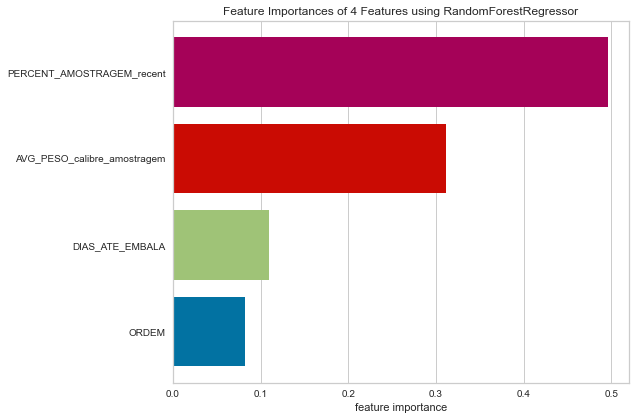

<AxesSubplot:title={'center':'Feature Importances of 4 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
im = FeatureImportances(rf, relative = False)
im.fit(xtrain2,ytrain)
im.poof()

In [96]:
xtrain2

,ORDEM,PERCENT_AMOSTRAGEM_recent,DIAS_ATE_EMBALA,AVG_PESO_calibre_amostragem
633,1,0.152212,7,520.888083
603,7,0.000000,24,0.000000
637,2,0.030713,8,834.821667
158,5,0.166499,16,458.479267
331,4,0.213280,9,590.914333
...,...,...,...,...
460,3,0.089703,30,409.929556
354,7,0.088999,17,459.262714
189,10,0.000000,30,0.000000
92,6,0.011717,27,720.680000


In [97]:
new_dados = [[2, 0.36, 2, 690.20], [5, 0.36, 4, 690.20], [7, 0.36, 10, 690.20]]
rf.predict(new_dados)

array([0.42413043, 0.4072    , 0.37358261])

In [67]:
#### A MEDIA DE PESO DE CADA CALIBRE NA ULTIMA AMOSTRAGEM (JUNTANDO TODOS OS PESOS DE TODOS OS FRUTOS)
#### DIAS DA ULTIMA AMOSTRAGEM ATE A EMBALAGEM
#### PERCENTUAL DA DO CALIBRE NA AMOSTRAGEM MAIS RECENTE

## MEDIA DE PESO = MEDIA DE PESO GERAL DAQUELA AMOSTRAGEM

### SOMATORIO DE FRUTOS AMOSTRADOS GERAL NAQUELA DATA MAIS RECENTE

### DEFINIR METRICAS DA AMOSTRAGEM - QUANTOS DIAS ANTES/QTD FRUTOS.



In [98]:
#### EM 80 testes, apenas um teve uma previsao bem proxima de 0.1 ou 10% do valor real
xtest2

,ORDEM,PERCENT_AMOSTRAGEM_recent,DIAS_ATE_EMBALA,AVG_PESO_calibre_amostragem
413,4,0.000000,17,0.000000
294,8,0.006306,27,0.000000
419,4,0.001980,17,335.409000
640,2,0.152212,8,520.888083
99,1,0.412884,6,685.619211
...,...,...,...,...
175,8,0.000000,22,0.000000
160,5,0.017717,16,384.160000
139,2,0.017717,8,384.160000
440,7,0.001980,23,335.409000


In [69]:
xtest

,variedade,ORDEM,VALOR_CALIBRE,PERCENT_AMOSTRAGEM_recent,DIAS_ATE_EMBALA,AVG_PESO_calibre_amostragem
413,TOMMY ATKINS,4,CALIBRE_5,0.000000,17,0.000000
294,KEITT,8,CALIBRE_5,0.006306,27,0.000000
419,TOMMY ATKINS,4,CALIBRE_12,0.001980,17,335.409000
640,KEITT,2,CALIBRE_8,0.152212,8,520.888083
99,KEITT,1,CALIBRE_6,0.412884,6,685.619211
...,...,...,...,...,...,...
175,KEITT,8,CALIBRE_5,0.000000,22,0.000000
160,KEITT,5,CALIBRE_12,0.017717,16,384.160000
139,KEITT,2,CALIBRE_12,0.017717,8,384.160000
440,TOMMY ATKINS,7,CALIBRE_12,0.001980,23,335.409000


In [99]:
xtest['Real'] = ytest
xtest['Previsto'] = pred

C:\Users\BERNAR~1.COL\AppData\Local\Temp/ipykernel_18116/4289388113.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\BERNAR~1.COL\AppData\Local\Temp/ipykernel_18116/4289388113.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [100]:
xtest

,variedade,ORDEM,VALOR_CALIBRE,PERCENT_AMOSTRAGEM_recent,DIAS_ATE_EMBALA,AVG_PESO_calibre_amostragem,Real,Previsto
413,TOMMY ATKINS,4,CALIBRE_5,0.000000,17,0.000000,0.000,0.022823
294,KEITT,8,CALIBRE_5,0.006306,27,0.000000,0.012,0.029691
419,TOMMY ATKINS,4,CALIBRE_12,0.001980,17,335.409000,0.024,0.031926
640,KEITT,2,CALIBRE_8,0.152212,8,520.888083,0.009,0.057217
99,KEITT,1,CALIBRE_6,0.412884,6,685.619211,0.398,0.420935
...,...,...,...,...,...,...,...,...
175,KEITT,8,CALIBRE_5,0.000000,22,0.000000,0.005,0.023598
160,KEITT,5,CALIBRE_12,0.017717,16,384.160000,0.016,0.017404
139,KEITT,2,CALIBRE_12,0.017717,8,384.160000,0.000,0.001026
440,TOMMY ATKINS,7,CALIBRE_12,0.001980,23,335.409000,0.119,0.085561


In [102]:
xtest['Error'] = abs(abs(xtest['Real']) - abs(xtest['Previsto']))

xtest['Erro_neg'] = xtest['Real'] - xtest['Previsto']

C:\Users\BERNAR~1.COL\AppData\Local\Temp/ipykernel_18116/1645170452.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\BERNAR~1.COL\AppData\Local\Temp/ipykernel_18116/1645170452.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [103]:
xtest

,variedade,ORDEM,VALOR_CALIBRE,PERCENT_AMOSTRAGEM_recent,DIAS_ATE_EMBALA,AVG_PESO_calibre_amostragem,Real,Previsto,Error,Erro_neg
413,TOMMY ATKINS,4,CALIBRE_5,0.000000,17,0.000000,0.000,0.022823,0.022823,-0.022823
294,KEITT,8,CALIBRE_5,0.006306,27,0.000000,0.012,0.029691,0.017691,-0.017691
419,TOMMY ATKINS,4,CALIBRE_12,0.001980,17,335.409000,0.024,0.031926,0.007926,-0.007926
640,KEITT,2,CALIBRE_8,0.152212,8,520.888083,0.009,0.057217,0.048217,-0.048217
99,KEITT,1,CALIBRE_6,0.412884,6,685.619211,0.398,0.420935,0.022935,-0.022935
...,...,...,...,...,...,...,...,...,...,...
175,KEITT,8,CALIBRE_5,0.000000,22,0.000000,0.005,0.023598,0.018598,-0.018598
160,KEITT,5,CALIBRE_12,0.017717,16,384.160000,0.016,0.017404,0.001404,-0.001404
139,KEITT,2,CALIBRE_12,0.017717,8,384.160000,0.000,0.001026,0.001026,-0.001026
440,TOMMY ATKINS,7,CALIBRE_12,0.001980,23,335.409000,0.119,0.085561,0.033439,0.033439


In [104]:
def check(xtest):
    if xtest['Error'] > 0.11:
        return 'ERROU'
    else:
        return 'ACERTOU'
        
xtest['Check'] = xtest.apply(check, axis = 1)

C:\Users\BERNAR~1.COL\AppData\Local\Temp/ipykernel_18116/1169874289.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
fig = px.histogram(xtest, x = 'Erro_neg', color = 'VALOR_CALIBRE', marginal = 'violin')
fig

In [77]:
fig = px.bar(xtest, x = 'VALOR_CALIBRE', color = 'Check', facet_col = 'variedade', title = 'Threshold = 10 % do valor real')
fig.update_layout(height = 500, width = 1200)
fig

In [78]:
xtest

,variedade,ORDEM,VALOR_CALIBRE,PERCENT_AMOSTRAGEM_recent,DIAS_ATE_EMBALA,AVG_PESO_calibre_amostragem,Real,Previsto,Error,Check
413,TOMMY ATKINS,4,CALIBRE_5,0.000000,17,0.000000,0.000,0.021630,0.021630,ACERTOU
294,KEITT,8,CALIBRE_5,0.006306,27,0.000000,0.012,0.031247,0.019247,ACERTOU
419,TOMMY ATKINS,4,CALIBRE_12,0.001980,17,335.409000,0.024,0.031261,0.007261,ACERTOU
640,KEITT,2,CALIBRE_8,0.152212,8,520.888083,0.009,0.052470,0.043470,ACERTOU
99,KEITT,1,CALIBRE_6,0.412884,6,685.619211,0.398,0.423148,0.025148,ACERTOU
...,...,...,...,...,...,...,...,...,...,...
175,KEITT,8,CALIBRE_5,0.000000,22,0.000000,0.005,0.023059,0.018059,ACERTOU
160,KEITT,5,CALIBRE_12,0.017717,16,384.160000,0.016,0.016617,0.000617,ACERTOU
139,KEITT,2,CALIBRE_12,0.017717,8,384.160000,0.000,0.001109,0.001109,ACERTOU
440,TOMMY ATKINS,7,CALIBRE_12,0.001980,23,335.409000,0.119,0.089177,0.029823,ACERTOU


In [79]:
xtrain

,variedade,ORDEM,VALOR_CALIBRE,PERCENT_AMOSTRAGEM_recent,DIAS_ATE_EMBALA,AVG_PESO_calibre_amostragem
633,KEITT,1,CALIBRE_8,0.152212,7,520.888083
603,TOMMY ATKINS,7,CALIBRE_6,0.000000,24,0.000000
637,KEITT,2,CALIBRE_5,0.030713,8,834.821667
158,KEITT,5,CALIBRE_9,0.166499,16,458.479267
331,KEITT,4,CALIBRE_7,0.213280,9,590.914333
...,...,...,...,...,...,...
460,KEITT,3,CALIBRE_10,0.089703,30,409.929556
354,KEITT,7,CALIBRE_9,0.088999,17,459.262714
189,KEITT,10,CALIBRE_5,0.000000,30,0.000000
92,TOMMY ATKINS,6,CALIBRE_6,0.011717,27,720.680000


In [1316]:
fig = px.box(xtrain, x = 'VALOR_CALIBRE', y = 'PERCENT_AMOSTRAGEM_recent', facet_col = 'variedade')
fig

In [80]:
xtrain.groupby('variedade')['VALOR_CALIBRE'].value_counts()

variedade     VALOR_CALIBRE
KEITT         CALIBRE_8        29
              CALIBRE_9        26
              CALIBRE_5        25
              CALIBRE_10       24
              CALIBRE_6        22
              CALIBRE_12       16
              CALIBRE_7        16
TOMMY ATKINS  CALIBRE_8        14
              CALIBRE_10       13
              CALIBRE_6        13
              CALIBRE_5        11
              CALIBRE_7        10
              CALIBRE_9        10
              CALIBRE_12        8
Name: VALOR_CALIBRE, dtype: int64

In [81]:
xtest.groupby('variedade')['VALOR_CALIBRE'].value_counts()

variedade     VALOR_CALIBRE
KEITT         CALIBRE_5        10
              CALIBRE_12        8
              CALIBRE_6         7
              CALIBRE_9         7
              CALIBRE_7         4
              CALIBRE_8         3
              CALIBRE_10        2
TOMMY ATKINS  CALIBRE_5         6
              CALIBRE_9         6
              CALIBRE_12        3
              CALIBRE_8         3
              CALIBRE_10        2
              CALIBRE_6         2
              CALIBRE_7         1
Name: VALOR_CALIBRE, dtype: int64

In [82]:
xtest

,variedade,ORDEM,VALOR_CALIBRE,PERCENT_AMOSTRAGEM_recent,DIAS_ATE_EMBALA,AVG_PESO_calibre_amostragem,Real,Previsto,Error,Check
413,TOMMY ATKINS,4,CALIBRE_5,0.000000,17,0.000000,0.000,0.021630,0.021630,ACERTOU
294,KEITT,8,CALIBRE_5,0.006306,27,0.000000,0.012,0.031247,0.019247,ACERTOU
419,TOMMY ATKINS,4,CALIBRE_12,0.001980,17,335.409000,0.024,0.031261,0.007261,ACERTOU
640,KEITT,2,CALIBRE_8,0.152212,8,520.888083,0.009,0.052470,0.043470,ACERTOU
99,KEITT,1,CALIBRE_6,0.412884,6,685.619211,0.398,0.423148,0.025148,ACERTOU
...,...,...,...,...,...,...,...,...,...,...
175,KEITT,8,CALIBRE_5,0.000000,22,0.000000,0.005,0.023059,0.018059,ACERTOU
160,KEITT,5,CALIBRE_12,0.017717,16,384.160000,0.016,0.016617,0.000617,ACERTOU
139,KEITT,2,CALIBRE_12,0.017717,8,384.160000,0.000,0.001109,0.001109,ACERTOU
440,TOMMY ATKINS,7,CALIBRE_12,0.001980,23,335.409000,0.119,0.089177,0.029823,ACERTOU


In [83]:
##### SALVANDO MODELO ABRINDO E TESTANDO
new_dados = [[2, 0.36, 2, 690.20], [5, 0.36, 4, 690.20], [7, 0.36, 10, 690.20]]
rf.predict(new_dados)

array([0.43183478, 0.4165087 , 0.37376957])

In [84]:
# import pickle
# with open('Modelo_final.pkl','wb') as file:
#   pickle.dump(rf, file)

In [85]:
# import pickle

# with open('Modelo_final.pkl', 'rb') as f:
#     modelo = pickle.load(f)


In [86]:
modelo

RandomForestRegressor(n_estimators=230)

In [87]:
rf

RandomForestRegressor(n_estimators=230)

In [88]:
##### SALVANDO MODELO ABRINDO E TESTANDO

new_dados = [[2, 0.36, 2, 690.20], [5, 0.36, 4, 690.20], [7, 0.36, 10, 690.20]]
modelo.predict(new_dados)

array([0.43183478, 0.4165087 , 0.37376957])

In [89]:
data_test_total = pd.read_excel('dados_sem_na33_new.xlsx', sheet_name = 'dados_teste_new')

In [90]:
data_test_total

,talhao_calibre,SAFRA_ST_CODIGO,TALH_ST_DESCRICAO,variedade,CPROC_IN_CODIGO,DATA_EMBALAGEM,ORDEM,VALOR_CALIBRE,CALIBRE,PERCENT_AMOSTRAGEM_recent,DATA_AMOSTRAGEM,DIAS_ATE_EMBALA,AVG_PESO_calibre_amostragem
0,AGD BAHIA-049CALIBRE_5,M22,AGD BAHIA-049,KENT,895,2022-09-07,1,CALIBRE_5,0.249,0.047494,2022-08-24,14,813.469000
1,AGD BAHIA-049CALIBRE_6,M22,AGD BAHIA-049,KENT,895,2022-09-07,1,CALIBRE_6,0.465,0.338096,2022-08-24,14,688.285636
2,AGD BAHIA-049CALIBRE_7,M22,AGD BAHIA-049,KENT,895,2022-09-07,1,CALIBRE_7,0.162,0.178507,2022-08-24,14,594.366700
3,AGD BAHIA-049CALIBRE_8,M22,AGD BAHIA-049,KENT,895,2022-09-07,1,CALIBRE_8,0.075,0.187563,2022-08-24,14,513.097389
4,AGD BAHIA-049CALIBRE_9,M22,AGD BAHIA-049,KENT,895,2022-09-07,1,CALIBRE_9,0.000,0.074260,2022-08-24,14,464.637500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,DL-003CALIBRE_8,M22,DL-003,TOMMY ATKINS,912,2022-09-09,5,CALIBRE_8,0.339,0.369843,2022-08-23,17,518.242118
265,DL-003CALIBRE_9,M22,DL-003,TOMMY ATKINS,912,2022-09-09,5,CALIBRE_9,0.005,0.130471,2022-08-23,17,467.471091
266,DL-003CALIBRE_10,M22,DL-003,TOMMY ATKINS,912,2022-09-09,5,CALIBRE_10,0.260,0.118743,2022-08-23,17,422.532091
267,DL-003CALIBRE_12,M22,DL-003,TOMMY ATKINS,912,2022-09-09,5,CALIBRE_12,0.062,0.012775,2022-08-23,17,369.970000


In [91]:
xtest.columns

Index(['variedade', 'ORDEM', 'VALOR_CALIBRE', 'PERCENT_AMOSTRAGEM_recent',
       'DIAS_ATE_EMBALA', 'AVG_PESO_calibre_amostragem', 'Real', 'Previsto',
       'Error', 'Check'],
      dtype='object')

In [92]:
data_test_total = data_test_total[['variedade', 'ORDEM', 'VALOR_CALIBRE', 'PERCENT_AMOSTRAGEM_recent',
       'DIAS_ATE_EMBALA', 'AVG_PESO_calibre_amostragem','TALH_ST_DESCRICAO','CALIBRE']]

In [93]:
data_test_total2 = data_test_total.drop(columns = ['TALH_ST_DESCRICAO','variedade','VALOR_CALIBRE','CALIBRE'])

In [94]:
data_test_total2

,ORDEM,PERCENT_AMOSTRAGEM_recent,DIAS_ATE_EMBALA,AVG_PESO_calibre_amostragem
0,1,0.047494,14,813.469000
1,1,0.338096,14,688.285636
2,1,0.178507,14,594.366700
3,1,0.187563,14,513.097389
4,1,0.074260,14,464.637500
...,...,...,...,...
264,5,0.369843,17,518.242118
265,5,0.130471,17,467.471091
266,5,0.118743,17,422.532091
267,5,0.012775,17,369.970000


In [95]:
xtest2

,ORDEM,PERCENT_AMOSTRAGEM_recent,DIAS_ATE_EMBALA,AVG_PESO_calibre_amostragem
413,4,0.000000,17,0.000000
294,8,0.006306,27,0.000000
419,4,0.001980,17,335.409000
640,2,0.152212,8,520.888083
99,1,0.412884,6,685.619211
...,...,...,...,...
175,8,0.000000,22,0.000000
160,5,0.017717,16,384.160000
139,2,0.017717,8,384.160000
440,7,0.001980,23,335.409000


In [96]:
result = modelo.predict(data_test_total2)

In [97]:
data_test_total['PREVISTO'] = result

C:\Users\BERNAR~1.COL\AppData\Local\Temp/ipykernel_11296/522711677.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [98]:
data_test_total

,variedade,ORDEM,VALOR_CALIBRE,PERCENT_AMOSTRAGEM_recent,DIAS_ATE_EMBALA,AVG_PESO_calibre_amostragem,TALH_ST_DESCRICAO,CALIBRE,PREVISTO
0,KENT,1,CALIBRE_5,0.047494,14,813.469000,AGD BAHIA-049,0.249,0.257239
1,KENT,1,CALIBRE_6,0.338096,14,688.285636,AGD BAHIA-049,0.465,0.407983
2,KENT,1,CALIBRE_7,0.178507,14,594.366700,AGD BAHIA-049,0.162,0.103083
3,KENT,1,CALIBRE_8,0.187563,14,513.097389,AGD BAHIA-049,0.075,0.133639
4,KENT,1,CALIBRE_9,0.074260,14,464.637500,AGD BAHIA-049,0.000,0.111930
...,...,...,...,...,...,...,...,...,...
264,TOMMY ATKINS,5,CALIBRE_8,0.369843,17,518.242118,DL-003,0.339,0.237987
265,TOMMY ATKINS,5,CALIBRE_9,0.130471,17,467.471091,DL-003,0.005,0.172548
266,TOMMY ATKINS,5,CALIBRE_10,0.118743,17,422.532091,DL-003,0.260,0.116317
267,TOMMY ATKINS,5,CALIBRE_12,0.012775,17,369.970000,DL-003,0.062,0.012522


In [99]:
data_test_total['ERROR'] = abs(data_test_total['CALIBRE'] - data_test_total['PREVISTO'])
data_test_total

C:\Users\BERNAR~1.COL\AppData\Local\Temp/ipykernel_11296/3694283779.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,variedade,ORDEM,VALOR_CALIBRE,PERCENT_AMOSTRAGEM_recent,DIAS_ATE_EMBALA,AVG_PESO_calibre_amostragem,TALH_ST_DESCRICAO,CALIBRE,PREVISTO,ERROR
0,KENT,1,CALIBRE_5,0.047494,14,813.469000,AGD BAHIA-049,0.249,0.257239,0.008239
1,KENT,1,CALIBRE_6,0.338096,14,688.285636,AGD BAHIA-049,0.465,0.407983,0.057017
2,KENT,1,CALIBRE_7,0.178507,14,594.366700,AGD BAHIA-049,0.162,0.103083,0.058917
3,KENT,1,CALIBRE_8,0.187563,14,513.097389,AGD BAHIA-049,0.075,0.133639,0.058639
4,KENT,1,CALIBRE_9,0.074260,14,464.637500,AGD BAHIA-049,0.000,0.111930,0.111930
...,...,...,...,...,...,...,...,...,...,...
264,TOMMY ATKINS,5,CALIBRE_8,0.369843,17,518.242118,DL-003,0.339,0.237987,0.101013
265,TOMMY ATKINS,5,CALIBRE_9,0.130471,17,467.471091,DL-003,0.005,0.172548,0.167548
266,TOMMY ATKINS,5,CALIBRE_10,0.118743,17,422.532091,DL-003,0.260,0.116317,0.143683
267,TOMMY ATKINS,5,CALIBRE_12,0.012775,17,369.970000,DL-003,0.062,0.012522,0.049478


In [100]:
def check(data_test_total):
    if data_test_total['ERROR'] >  0.11:
        return 'ERROU'
    else:
        return 'ACERTOU'

data_test_total['Check'] = data_test_total.apply(check, axis = 1)

C:\Users\BERNAR~1.COL\AppData\Local\Temp/ipykernel_11296/3017657650.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [101]:
data_test_total

,variedade,ORDEM,VALOR_CALIBRE,PERCENT_AMOSTRAGEM_recent,DIAS_ATE_EMBALA,AVG_PESO_calibre_amostragem,TALH_ST_DESCRICAO,CALIBRE,PREVISTO,ERROR,Check
0,KENT,1,CALIBRE_5,0.047494,14,813.469000,AGD BAHIA-049,0.249,0.257239,0.008239,ACERTOU
1,KENT,1,CALIBRE_6,0.338096,14,688.285636,AGD BAHIA-049,0.465,0.407983,0.057017,ACERTOU
2,KENT,1,CALIBRE_7,0.178507,14,594.366700,AGD BAHIA-049,0.162,0.103083,0.058917,ACERTOU
3,KENT,1,CALIBRE_8,0.187563,14,513.097389,AGD BAHIA-049,0.075,0.133639,0.058639,ACERTOU
4,KENT,1,CALIBRE_9,0.074260,14,464.637500,AGD BAHIA-049,0.000,0.111930,0.111930,ERROU
...,...,...,...,...,...,...,...,...,...,...,...
264,TOMMY ATKINS,5,CALIBRE_8,0.369843,17,518.242118,DL-003,0.339,0.237987,0.101013,ACERTOU
265,TOMMY ATKINS,5,CALIBRE_9,0.130471,17,467.471091,DL-003,0.005,0.172548,0.167548,ERROU
266,TOMMY ATKINS,5,CALIBRE_10,0.118743,17,422.532091,DL-003,0.260,0.116317,0.143683,ERROU
267,TOMMY ATKINS,5,CALIBRE_12,0.012775,17,369.970000,DL-003,0.062,0.012522,0.049478,ACERTOU


In [102]:
### VOU REMOVER OUTLIERS CONFORME OS LIMITES ENCONTRADOS PARA AS VARIAVEIS 

In [103]:
df_clean9_model


,TALH_ST_DESCRICAO,variedade,ORDEM,VALOR_CALIBRE,CALIBRE,PERCENT_AMOSTRAGEM_recent,DIAS_ATE_EMBALA,avg_larg_calibre_amost,avg_com_calibre_amost,avg_altura_calibre_amost,AVG_PESO_calibre_amostragem,AVG_frutos_calibre_amostragem,avg_larg_amostra,avg_comp_amostra,avg_altura_amostra,MEDIA_PESO,frutos_amostrados,percent_Acerto
0,AGD BAHIA-034,KEITT,1,CALIBRE_5,0.224,0.018586,19,87.333333,107.666667,153.000000,791.211333,30.666667,81.140000,98.020000,133.980000,591.392930,4950,0.732143
1,AGD BAHIA-034,KEITT,1,CALIBRE_6,0.380,0.374747,19,84.195122,102.365854,141.487805,670.825561,45.243902,81.140000,98.020000,133.980000,591.392930,4950,0.616071
3,AGD BAHIA-034,KEITT,1,CALIBRE_8,0.074,0.188283,19,77.952381,93.428571,129.904762,520.191571,44.380952,81.140000,98.020000,133.980000,591.392930,4950,0.651786
6,AGD BAHIA-034,KEITT,1,CALIBRE_12,0.003,0.020000,19,71.000000,84.000000,116.000000,380.269000,49.500000,81.140000,98.020000,133.980000,591.392930,4950,0.776786
7,AGD BAHIA-034,KEITT,2,CALIBRE_5,0.170,0.018586,19,87.333333,107.666667,153.000000,791.211333,30.666667,81.140000,98.020000,133.980000,591.392930,4950,0.732143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,DL-005,KEITT,2,CALIBRE_8,0.009,0.152212,8,95.500000,126.333333,78.500000,520.888083,65.666667,100.777778,137.060606,83.151515,634.595081,5045,0.651786
644,DL-005,KEITT,3,CALIBRE_5,0.277,0.030713,14,109.666667,148.333333,93.333333,834.821667,53.000000,100.777778,137.060606,83.151515,634.595081,5045,0.732143
647,DL-005,KEITT,3,CALIBRE_8,0.020,0.152212,14,95.500000,126.333333,78.500000,520.888083,65.666667,100.777778,137.060606,83.151515,634.595081,5045,0.651786
651,DL-005,KEITT,4,CALIBRE_5,0.153,0.030713,15,109.666667,148.333333,93.333333,834.821667,53.000000,100.777778,137.060606,83.151515,634.595081,5045,0.732143


In [104]:
fig = px.box(df_clean9_model, x = 'VALOR_CALIBRE', y = 'AVG_PESO_calibre_amostragem', facet_col = 'variedade')
fig.update_layout(height = 400, width = 900)

In [105]:
fig = px.box(data_test_total, x = 'VALOR_CALIBRE', y = 'AVG_PESO_calibre_amostragem', facet_col = 'variedade')
fig.update_layout(height = 400, width = 900)

In [106]:
def remove_outliers(data_test_total):
    if data_test_total['variedade'] == 'KEITT':
        if data_test_total['VALOR_CALIBRE'] == 'CALIBRE_5':
            if data_test_total['PERCENT_AMOSTRAGEM_recent'] > 0.1 or data_test_total['PERCENT_AMOSTRAGEM_recent'] < 0:
                return 'OUT'
            else: 
                return 'IN'
        if data_test_total['VALOR_CALIBRE'] == 'CALIBRE_6':
            if data_test_total['PERCENT_AMOSTRAGEM_recent'] > 0.5 or data_test_total['PERCENT_AMOSTRAGEM_recent'] < 0.10:
                return 'OUT'
            else: 
                return 'IN'
        if data_test_total['VALOR_CALIBRE'] == 'CALIBRE_7':
            if data_test_total['PERCENT_AMOSTRAGEM_recent'] > 0.35 or data_test_total['PERCENT_AMOSTRAGEM_recent'] < 0.17:
                return 'OUT'
            else: 
                return 'IN'

        if data_test_total['VALOR_CALIBRE'] == 'CALIBRE_8':
            if data_test_total['PERCENT_AMOSTRAGEM_recent'] > 0.35 or data_test_total['PERCENT_AMOSTRAGEM_recent'] < 0.07:
                return 'OUT'
            else: 
                return 'IN'
        if data_test_total['VALOR_CALIBRE'] == 'CALIBRE_9':
            if data_test_total['PERCENT_AMOSTRAGEM_recent'] > 0.2 or data_test_total['PERCENT_AMOSTRAGEM_recent'] < 0.05:
                return 'OUT'
            else: 
                return 'IN'
        if data_test_total['VALOR_CALIBRE'] == 'CALIBRE_10':
            if data_test_total['PERCENT_AMOSTRAGEM_recent'] > 0.2 or data_test_total['PERCENT_AMOSTRAGEM_recent'] < 0.001:
                return 'OUT'
            else: 
                return 'IN'

        if data_test_total['VALOR_CALIBRE'] == 'CALIBRE_12':
            if data_test_total['PERCENT_AMOSTRAGEM_recent'] > 0.02 or data_test_total['PERCENT_AMOSTRAGEM_recent'] < 0.01:
                return 'OUT'
            else: 
                return 'IN'

        if data_test_total['VALOR_CALIBRE'] == 'CALIBRE_14':
            if data_test_total['PERCENT_AMOSTRAGEM_recent'] > 0.1 or data_test_total['PERCENT_AMOSTRAGEM_recent'] < 0:
                return 'OUT'
            else: 
                return 'IN'

    if data_test_total['variedade'] == 'TOMMY ATKINS':
        if data_test_total['VALOR_CALIBRE'] == 'CALIBRE_5':
            if data_test_total['PERCENT_AMOSTRAGEM_recent'] > 0:
                return 'OUT'
            else: 
                return 'IN'
        if data_test_total['VALOR_CALIBRE'] == 'CALIBRE_6':
            if data_test_total['PERCENT_AMOSTRAGEM_recent'] > 0.11:
                return 'OUT'
            else: 
                return 'IN'
        if data_test_total['VALOR_CALIBRE'] == 'CALIBRE_7':
            if data_test_total['PERCENT_AMOSTRAGEM_recent'] > 0.12 or data_test_total['PERCENT_AMOSTRAGEM_recent'] < 0.02:
                return 'OUT'
            else: 
                return 'IN'

        if data_test_total['VALOR_CALIBRE'] == 'CALIBRE_8':
            if data_test_total['PERCENT_AMOSTRAGEM_recent'] > 0.32 or data_test_total['PERCENT_AMOSTRAGEM_recent'] < 0.07:
                return 'OUT'
            else: 
                return 'IN'
        if data_test_total['VALOR_CALIBRE'] == 'CALIBRE_9':
            if data_test_total['PERCENT_AMOSTRAGEM_recent'] > 0.25 or data_test_total['PERCENT_AMOSTRAGEM_recent'] < 0.08:
                return 'OUT'
            else: 
                return 'IN'
        if data_test_total['VALOR_CALIBRE'] == 'CALIBRE_10':
            if data_test_total['PERCENT_AMOSTRAGEM_recent'] > 0.40 or data_test_total['PERCENT_AMOSTRAGEM_recent'] < 0.10:
                return 'OUT'
            else: 
                return 'IN'

        if data_test_total['VALOR_CALIBRE'] == 'CALIBRE_12':
            if data_test_total['PERCENT_AMOSTRAGEM_recent'] > 0.22 or data_test_total['PERCENT_AMOSTRAGEM_recent'] < 0.001:
                return 'OUT'
            else: 
                return 'IN'

        if data_test_total['VALOR_CALIBRE'] == 'CALIBRE_14':
            if data_test_total['PERCENT_AMOSTRAGEM_recent'] > 0.1 or data_test_total['PERCENT_AMOSTRAGEM_recent'] < 0:
                return 'OUT'
            else: 
                return 'IN'
    
    else:
        return 'IN'

data_test_total['REMOVE'] = data_test_total.apply(remove_outliers, axis =1)


C:\Users\BERNAR~1.COL\AppData\Local\Temp/ipykernel_11296/2705853917.py:95: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
data_test_total_filtro = data_test_total['REMOVE'] != 'OUT'
data_test_total2 = data_test_total[data_test_total_filtro]

In [108]:
data_test_total2

,variedade,ORDEM,VALOR_CALIBRE,PERCENT_AMOSTRAGEM_recent,DIAS_ATE_EMBALA,AVG_PESO_calibre_amostragem,TALH_ST_DESCRICAO,CALIBRE,PREVISTO,ERROR,Check,REMOVE
0,KENT,1,CALIBRE_5,0.047494,14,813.469000,AGD BAHIA-049,0.249,0.257239,0.008239,ACERTOU,IN
1,KENT,1,CALIBRE_6,0.338096,14,688.285636,AGD BAHIA-049,0.465,0.407983,0.057017,ACERTOU,IN
2,KENT,1,CALIBRE_7,0.178507,14,594.366700,AGD BAHIA-049,0.162,0.103083,0.058917,ACERTOU,IN
3,KENT,1,CALIBRE_8,0.187563,14,513.097389,AGD BAHIA-049,0.075,0.133639,0.058639,ACERTOU,IN
4,KENT,1,CALIBRE_9,0.074260,14,464.637500,AGD BAHIA-049,0.000,0.111930,0.111930,ERROU,IN
...,...,...,...,...,...,...,...,...,...,...,...,...
262,TOMMY ATKINS,5,CALIBRE_6,0.083141,17,703.196857,DL-003,0.121,0.090296,0.030704,ACERTOU,IN
265,TOMMY ATKINS,5,CALIBRE_9,0.130471,17,467.471091,DL-003,0.005,0.172548,0.167548,ERROU,IN
266,TOMMY ATKINS,5,CALIBRE_10,0.118743,17,422.532091,DL-003,0.260,0.116317,0.143683,ERROU,IN
267,TOMMY ATKINS,5,CALIBRE_12,0.012775,17,369.970000,DL-003,0.062,0.012522,0.049478,ACERTOU,IN


In [109]:
fig = px.bar(data_test_total, x = 'VALOR_CALIBRE', color = 'Check', facet_col = 'variedade', hover_name = 'CALIBRE')
fig

In [110]:
data_test_total

,variedade,ORDEM,VALOR_CALIBRE,PERCENT_AMOSTRAGEM_recent,DIAS_ATE_EMBALA,AVG_PESO_calibre_amostragem,TALH_ST_DESCRICAO,CALIBRE,PREVISTO,ERROR,Check,REMOVE
0,KENT,1,CALIBRE_5,0.047494,14,813.469000,AGD BAHIA-049,0.249,0.257239,0.008239,ACERTOU,IN
1,KENT,1,CALIBRE_6,0.338096,14,688.285636,AGD BAHIA-049,0.465,0.407983,0.057017,ACERTOU,IN
2,KENT,1,CALIBRE_7,0.178507,14,594.366700,AGD BAHIA-049,0.162,0.103083,0.058917,ACERTOU,IN
3,KENT,1,CALIBRE_8,0.187563,14,513.097389,AGD BAHIA-049,0.075,0.133639,0.058639,ACERTOU,IN
4,KENT,1,CALIBRE_9,0.074260,14,464.637500,AGD BAHIA-049,0.000,0.111930,0.111930,ERROU,IN
...,...,...,...,...,...,...,...,...,...,...,...,...
264,TOMMY ATKINS,5,CALIBRE_8,0.369843,17,518.242118,DL-003,0.339,0.237987,0.101013,ACERTOU,OUT
265,TOMMY ATKINS,5,CALIBRE_9,0.130471,17,467.471091,DL-003,0.005,0.172548,0.167548,ERROU,IN
266,TOMMY ATKINS,5,CALIBRE_10,0.118743,17,422.532091,DL-003,0.260,0.116317,0.143683,ERROU,IN
267,TOMMY ATKINS,5,CALIBRE_12,0.012775,17,369.970000,DL-003,0.062,0.012522,0.049478,ACERTOU,IN


In [111]:
data_test_total['ERROR_AMOSTRA'] = abs(data_test_total['PERCENT_AMOSTRAGEM_recent'] - data_test_total['CALIBRE'])

In [112]:
data_test_total_filtro_dias1 = data_test_total['DIAS_ATE_EMBALA'] > 2

data_test_total_filtro_dias2 = data_test_total['DIAS_ATE_EMBALA'] < 37

data_test_total = data_test_total[data_test_total_filtro_dias1]

data_test_total = data_test_total[data_test_total_filtro_dias2]

C:\Users\BERNAR~1.COL\AppData\Local\Temp/ipykernel_11296/503701005.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [113]:
fig = px.bar(data_test_total, x = 'VALOR_CALIBRE', color = 'Check', facet_col = 'variedade', hover_name = 'ERROR_AMOSTRA')
fig

In [117]:
data_test_total.groupby(['VALOR_CALIBRE'])['Check'].value_counts()

VALOR_CALIBRE  Check  
CALIBRE_10     ACERTOU    27
               ERROU       6
CALIBRE_12     ACERTOU    27
               ERROU       5
CALIBRE_14     ACERTOU    14
CALIBRE_5      ACERTOU     9
               ERROU       3
CALIBRE_6      ACERTOU    14
               ERROU       3
CALIBRE_7      ACERTOU    25
               ERROU       3
CALIBRE_8      ACERTOU    30
               ERROU       3
CALIBRE_9      ACERTOU    27
               ERROU       6
Name: Check, dtype: int64

In [118]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(y = data_test_total['PREVISTO']*100, name = 'Pred'))

fig.add_trace(go.Scatter(y= data_test_total['CALIBRE']*100, name = 'Real'))

fig.add_trace(go.Bar(y = data_test_total['ERROR']*100, name = 'Error'))

fig.add_trace(go.Scatter(y = data_test_total['PERCENT_AMOSTRAGEM_recent']*100, name = 'AMOSTRA'))

fig.add_trace(go.Scatter(y = data_test_total['ERROR_AMOSTRA']*100, name = 'DIF AMOSTRA'))

fig.add_trace(go.Scatter(y = data_test_total['DIAS_ATE_EMBALA'], name = 'DIAS'))

fig.add_hline(10)

fig.update_layout(height = 650, width = 1650, title = 'Caliber (%) forecasting')

In [1371]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(y = data_test_total['PREVISTO']*100, name = 'Pred'))

fig.add_trace(go.Scatter(y= data_test_total['CALIBRE']*100, name = 'Real'))

fig.add_trace(go.Scatter(y = data_test_total['ERROR']*100, name = 'Error'))

fig.add_trace(go.Scatter(y = data_test_total['PERCENT_AMOSTRAGEM_recent']*100, name = 'AMOSTRA'))

fig.add_trace(go.Bar(y = data_test_total['ERROR_AMOSTRA']*100, name = 'DIF AMOSTRA'))

fig.add_trace(go.Scatter(y = data_test_total['DIAS_ATE_EMBALA'], name = 'DIAS'))

fig.add_hline(10)

fig.update_layout(height = 650, width = 1650, title = 'Caliber (%) forecasting')

In [119]:
fig = px.histogram(data_test_total, x = 'DIAS_ATE_EMBALA', y = 'ERROR', histfunc = 'avg', facet_col = 'VALOR_CALIBRE', color = 'variedade')
fig.add_hline(0.1)
fig.update_layout(height = 400, width =1800)

In [120]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
df = px.data.tips()
fig = px.pie(data_test_total, values='PREVISTO', names='VALOR_CALIBRE')
fig.show()

In [121]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
df = px.data.tips()
fig = px.pie(data_test_total, values='CALIBRE', names='VALOR_CALIBRE')
fig.show()

In [241]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=data_test_total['VALOR_CALIBRE'] , pull=[0, 0, 0, 0,0, 0.2, 0, 0], marker_colors = px.colors.cyclical.Twilight, values=data_test_total['PREVISTO'], name="Previsto"),
              1, 1)
fig.add_trace(go.Pie(labels=data_test_total['VALOR_CALIBRE'], pull=[0, 0, 0, 0,0,0.2, 0, 0, 0], values=data_test_total['CALIBRE'], name="Real"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", marker=dict(line = dict(color = '#000000', width = 1)))

fig.update_layout(height = 500, width = 1000,
    title_text="Comparativo das previsões - Distribuição total",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Previsto', x=0.17, y=0.5, font_size=20, showarrow=False),
                 dict(text='Real', x=0.80, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [179]:
ytt = data_test_total['CALIBRE']
ytt2 = data_test_total['PREVISTO']

In [192]:
fig = px.histogram(data_test_total, x = 'VALOR_CALIBRE', y = 'CALIBRE', histfunc = 'avg')
fig2 = px.histogram(data_test_total, x = 'VALOR_CALIBRE', y = 'PREVISTO', histfunc = 'avg')
fig2

In [206]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = data_test_total['VALOR_CALIBRE'],  marker_color='darkblue', y = data_test_total['CALIBRE'], histfunc = 'avg',name = 'Real' ))
fig.add_trace(go.Histogram(x = data_test_total['VALOR_CALIBRE'],   marker_color='royalblue',y = data_test_total['PREVISTO'], histfunc = 'avg', name = 'Previsto'))


fig.update_traces(marker_line_color = 'rgb(0,0,0)',marker_line_width = 1.5)

fig.update_layout(height = 600, width =1200, title = 'Médias previstas por calibre')

In [1394]:
fig = px.histogram(data_test_total, x = 'DIAS_ATE_EMBALA', y = 'PREVISTO', histfunc = 'avg', facet_col = 'VALOR_CALIBRE', color = 'variedade')
fig.add_hline(0.1)
fig.update_layout(height = 400, width =1800)

In [1395]:
### A GENTE V IU NA ANALISE QUE O CALIBRE 6 TENDE A CAIR NA KEITT AO LONGO DOS DIAS
### NESTE CASO AQUI ELE N CAIU, MAS O MODELO SEGUIU O PADRAO


### MESMA COISA O CALIBRE 10 DA TOMMY

In [1388]:
data_test_total

,variedade,ORDEM,VALOR_CALIBRE,PERCENT_AMOSTRAGEM_recent,DIAS_ATE_EMBALA,AVG_PESO_calibre_amostragem,TALH_ST_DESCRICAO,CALIBRE,PREVISTO,ERROR,Check,REMOVE,ERROR_AMOSTRA
0,KENT,1,CALIBRE_5,0.047494,14,813.469000,AGD BAHIA-049,0.249,0.261617,0.012617,ACERTOU,IN,0.201506
1,KENT,1,CALIBRE_6,0.338096,14,688.285636,AGD BAHIA-049,0.465,0.398530,0.066470,ACERTOU,IN,0.126904
2,KENT,1,CALIBRE_7,0.178507,14,594.366700,AGD BAHIA-049,0.162,0.101322,0.060678,ACERTOU,IN,0.016507
3,KENT,1,CALIBRE_8,0.187563,14,513.097389,AGD BAHIA-049,0.075,0.128691,0.053691,ACERTOU,IN,0.112563
4,KENT,1,CALIBRE_9,0.074260,14,464.637500,AGD BAHIA-049,0.000,0.114974,0.114974,ERROU,IN,0.074260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,TOMMY ATKINS,5,CALIBRE_8,0.369843,17,518.242118,DL-003,0.339,0.240104,0.098896,ACERTOU,OUT,0.030843
265,TOMMY ATKINS,5,CALIBRE_9,0.130471,17,467.471091,DL-003,0.005,0.175343,0.170343,ERROU,IN,0.125471
266,TOMMY ATKINS,5,CALIBRE_10,0.118743,17,422.532091,DL-003,0.260,0.121743,0.138257,ERROU,IN,0.141257
267,TOMMY ATKINS,5,CALIBRE_12,0.012775,17,369.970000,DL-003,0.062,0.012574,0.049426,ACERTOU,IN,0.049225


In [ ]:
#### AQUI MOSTRA QUE QUANDO TENHO DIAS MAIORES TENHO TENDENCIA A ERRAR MAIS NA AMOSTRA E COM ISSO TBM O MODELO

In [1367]:
data_test_total.corr()

,ORDEM,PERCENT_AMOSTRAGEM_recent,DIAS_ATE_EMBALA,AVG_PESO_calibre_amostragem,CALIBRE,PREVISTO,ERROR,ERROR_AMOSTRA
ORDEM,1.000000,0.073625,0.466926,-0.116343,0.050112,0.202760,0.084734,0.108021
PERCENT_AMOSTRAGEM_recent,0.073625,1.000000,0.006577,0.133958,0.650466,0.756865,0.088027,0.334522
DIAS_ATE_EMBALA,0.466926,0.006577,1.000000,0.070988,-0.022215,0.162710,0.198174,0.249060
AVG_PESO_calibre_amostragem,-0.116343,0.133958,0.070988,1.000000,0.411696,0.414663,0.094407,0.223996
CALIBRE,0.050112,0.650466,-0.022215,0.411696,1.000000,0.741496,0.191081,0.396247
PREVISTO,0.202760,0.756865,0.162710,0.414663,0.741496,1.000000,0.099690,0.390395
ERROR,0.084734,0.088027,0.198174,0.094407,0.191081,0.099690,1.000000,0.538467
ERROR_AMOSTRA,0.108021,0.334522,0.249060,0.223996,0.396247,0.390395,0.538467,1.000000


In [ ]:
### UMA ALTA CORREL COM ERRO DA AMOSTRA E ERRO DA PREVISAO
### E UMA CORREL DA DIAS ATE EMBALA COM ERRO DA AMOSTRA

In [1351]:
data_test_total['DIAS_ATE_EMBALA'].describe()

count    269.000000
mean      19.401487
std       13.389492
min       -1.000000
25%        9.000000
50%       16.000000
75%       29.000000
max       44.000000
Name: DIAS_ATE_EMBALA, dtype: float64

In [1257]:
fig = px.box(data_test_total, x = 'VALOR_CALIBRE', y = 'PERCENT_AMOSTRAGEM_recent', facet_col = 'variedade')
fig.update_layout(height = 400, width = 900)

In [1251]:
fig = px.box(df_clean9_model, x = 'VALOR_CALIBRE', y = 'DIAS_ATE_EMBALA', facet_col = 'variedade')
fig.update_layout(height = 400, width = 900)

In [1252]:
fig = px.box(df_clean9_model, x = 'VALOR_CALIBRE', y = 'AVG_PESO_calibre_amostragem', facet_col = 'variedade')
fig.update_layout(height = 400, width = 900)

In [1253]:
fig = px.box(df_clean9_model, x = 'VALOR_CALIBRE', y = 'ORDEM', facet_col = 'variedade')
fig.update_layout(height = 400, width = 900)